# Natural Language Processing
![](https://i.imgur.com/qkg2E2D.png)

## Assignment 003 - NER Tagger

> Notebook by:
> - NLP Course Staff

## Revision History

| Version | Date       | User        | Content / Changes                                                   |
|---------|------------|-------------|---------------------------------------------------------------------|
| 0.1.000 | 21/05/2024 | course staff| First version                                                       |
| 0.1.001 | 23/05/2024 | course staff| Updated instructions for `Vocab` class to allow flexible special tokens definition |

## Overview
In this assignment, you will build a complete training and testing pipeline for a neural sequential tagger for named entities using LSTM.

## Dataset
You will work with the ReCoNLL 2003 dataset, a corrected version of the [CoNLL 2003 dataset](https://www.clips.uantwerpen.be/conll2003/ner/):

**Click on those links so you have access to the data!**
- [Train data](https://drive.google.com/file/d/1CqEGoLPVKau3gvVrdG6ORyfOEr1FSZGf/view?usp=sharing)

- [Dev data](https://drive.google.com/file/d/1rdUida-j3OXcwftITBlgOh8nURhAYUDw/view?usp=sharing)

- [Test data](https://drive.google.com/file/d/137Ht40OfflcsE6BIYshHbT5b2iIJVaDx/view?usp=sharing)

As you will see, the annotated texts are labeled according to the `IOB` annotation scheme (more on this below), for 3 entity types: Person, Organization, Location.

## Your Implementation

Please create a local copy of this template Colab's Notebook:

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1VVtBtlwZZnxQWdluNVkDgTMvDKVaqDOM?usp=sharing)

The assignment's instructions are there; follow the notebook.

## Submission
- **Notebook Link**: Add the URL to your assignment's notebook in the `notebook_link.txt` file, following the format provided in the example.
- **Access**: Ensure the link has edit permissions enabled to allow modifications if needed.
- **Deadline**: <font color='green'>06/06/2024</font>.
- **Platform**: Continue using GitHub for submissions. Push your project to the team repository and monitor the test results under the actions section.

Good Luck 🤗


<!-- ## NER schemes:  

> `IO`: is the simplest scheme that can be applied to this task. In this scheme, each token from the dataset is assigned one of two tags: an inside tag (`I`) and an outside tag (`O`). The `I` tag is for named entities, whereas the `O` tag is for normal words. This scheme has a limitation, as it cannot correctly encode consecutive entities of the same type.

> `IOB`: This scheme is also referred to in the literature as BIO and has been adopted by the Conference on Computational Natural Language Learning (CoNLL) [1]. It assigns a tag to each word in the text, determining whether it is the beginning (`B`) of a known named entity, inside (`I`) it, or outside (`O`) of any known named entities.

> `IOE`: This scheme works nearly identically to `IOB`, but it indicates the end of the entity (`E` tag) instead of its beginning.

> `IOBES`: An alternative to the IOB scheme is `IOBES`, which increases the amount of information related to the boundaries of named entities. In addition to tagging words at the beginning (`B`), inside (`I`), end (`E`), and outside (`O`) of a named entity. It also labels single-token entities with the tag `S`.

> `BI`: This scheme tags entities in a similar method to `IOB`. Additionally, it labels the beginning of non-entity words with the tag B-O and the rest as I-O.

> `IE`: This scheme works exactly like `IOE` with the distinction that it labels the end of non-entity words with the tag `E-O` and the rest as `I-O`.

> `BIES`: This scheme encodes the entities similar to `IOBES`. In addition, it also encodes the non-entity words using the same method. It uses `B-O` to tag the beginning of non-entity words, `I-O` to tag the inside of non-entity words, and `S-O` for single non-entity tokens that exist between two entities. -->


## NER Schemes

### IO
- **Description**: The simplest scheme for named entity recognition (NER).
- **Tags**:
  - `I`: Inside a named entity.
  - `O`: Outside any named entity.
- **Limitation**: Cannot correctly encode consecutive entities of the same type.

### IOB (BIO)
- **Description**: Adopted by the Conference on Computational Natural Language Learning (CoNLL).
- **Tags**:
  - `B`: Beginning of a named entity.
  - `I`: Inside a named entity.
  - `O`: Outside any named entity.
- **Advantage**: Can encode the boundaries of consecutive entities.

### IOE
- **Description**: Similar to IOB, but indicates the end of an entity.
- **Tags**:
  - `I`: Inside a named entity.
  - `O`: Outside any named entity.
  - `E`: End of a named entity.
- **Advantage**: Focuses on the end boundary of entities.

### IOBES
- **Description**: An extension of IOB with additional boundary information.
- **Tags**:
  - `B`: Beginning of a named entity.
  - `I`: Inside a named entity.
  - `O`: Outside any named entity.
  - `E`: End of a named entity.
  - `S`: Single-token named entity.
- **Advantage**: Provides more detailed boundary information for named entities.

### BI
- **Description**: Tags entities similarly to IOB and labels the beginning of non-entity words.
- **Tags**:
  - `B`: Beginning of a named entity.
  - `I`: Inside a named entity.
  - `B-O`: Beginning of a non-entity word.
  - `I-O`: Inside a non-entity word.
- **Advantage**: Distinguishes the beginning of non-entity sequences.

### IE
- **Description**: Similar to IOE but for non-entity words.
- **Tags**:
  - `I`: Inside a named entity.
  - `O`: Outside any named entity.
  - `E`: End of a named entity.
  - `E-O`: End of a non-entity word.
  - `I-O`: Inside a non-entity word.
- **Advantage**: Highlights the end of non-entity sequences.

### BIES
- **Description**: Encodes both entities and non-entity words using the IOBES method.
- **Tags**:
  - `B`: Beginning of a named entity.
  - `I`: Inside a named entity.
  - `O`: Outside any named entity.
  - `E`: End of a named entity.
  - `S`: Single-token named entity.
  - `B-O`: Beginning of a non-entity word.
  - `I-O`: Inside a non-entity word.
  - `S-O`: Single non-entity token.
- **Advantage**: Comprehensive encoding for both entities and non-entities.




In [ ]:
!mkdir data
# Fetch data
# train_link = 'https://drive.google.com/file/d/1CqEGoLPVKau3gvVrdG6ORyfOEr1FSZGf/view?usp=sharing'
# dev_link   = 'https://drive.google.com/file/d/1rdUida-j3OXcwftITBlgOh8nURhAYUDw/view?usp=sharing'
# test_link  = 'https://drive.google.com/file/d/137Ht40OfflcsE6BIYshHbT5b2iIJVaDx/view?usp=sharing'

!wget -q --no-check-certificate 'https://docs.google.com/uc?export=download&id=1CqEGoLPVKau3gvVrdG6ORyfOEr1FSZGf' -O data/train.txt
!wget -q --no-check-certificate 'https://docs.google.com/uc?export=download&id=1rdUida-j3OXcwftITBlgOh8nURhAYUDw' -O data/dev.txt
!wget -q --no-check-certificate 'https://docs.google.com/uc?export=download&id=137Ht40OfflcsE6BIYshHbT5b2iIJVaDx' -O data/test.txt


In [ ]:
# Any additional needed libraries
# !pip install --q

In [ ]:
# Standard Library Imports
import os
import copy
import random
import warnings
from collections import defaultdict
from typing import Optional

# ML
import numpy as np
import scipy as sp
import pandas as pd

# Visual
import matplotlib
import seaborn as sns
from tqdm import tqdm
from tabulate import tabulate
import matplotlib.pyplot as plt
from IPython.display import display

# DL
import torch as th
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import DataLoader, Dataset

# Metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score , roc_auc_score, classification_report, confusion_matrix, precision_recall_fscore_support


In [ ]:
SEED = 42
# Set the random seed for Python
random.seed(SEED)

# Set the random seed for numpy
np.random.seed(SEED)

# Set the random seed for pytorch
th.manual_seed(SEED)

# If using CUDA (for GPU operations)
th.cuda.manual_seed(SEED)

# Set up the device
# TO DO ----------------------------------------------------------------------
DEVICE = "cuda"
# TO DO ----------------------------------------------------------------------
assert DEVICE == "cuda"

DataType = list[tuple[list[str],list[str]]]

# Part 1 - Dataset Preparation

## Step 1: Read Data
Write a function for reading the data from a single file (of the ones that are provided above).   
- The function recieves a filepath
- The funtion encodes every sentence individually using a pair of lists, one list contains the words and one list contains the tags.
- Each list pair will be added to a general list (data), which will be returned back from the function.

Example output:
```
[
  (['At','Trent','Bridge',':'],['O','B-LOC','I-LOC ','O']),
  ([...],[...]),
  ...
]
```

In [ ]:
def read_data(filepath:str) -> DataType:
  """
  Read data from a single file.
  The function recieves a filepath
  The funtion encodes every sentence using a pair of lists, one list contains the words and one list contains the tags.
  :param filepath: path to the file
  :return: data as a list of tuples
  """
  data = []
  # TO DO ----------------------------------------------------------------------
  with open(filepath, 'r') as f:
    lines = f.readlines()
    words, tags = [], []
    # iterate all the tags and words and add them to seperate lists
    for line in lines:
      if line == '\n':
        # if it's an empty line
        data.append((words, tags))
        words, tags = [], []
      else:
        word, tag = line.strip().split()
        words.append(word)
        tags.append(tag)

  # TO DO ----------------------------------------------------------------------
  return data

In [ ]:
train = read_data("data/train.txt")
dev = read_data("data/dev.txt")
test = read_data("data/test.txt")

## Step 2: Create Vocab

The `Vocab` class will serve as a dictionary that maps words and tags into IDs. Ensure that you include special tokens to handle out-of-vocabulary words and padding.

### Your Task
1. **Define Special Tokens**: Define special tokens such as `PAD_TOKEN` and `UNK_TOKEN` and assign them unique IDs.
2. **Initialize Dictionaries**: Populate the word and tag dictionaries based on the training set.

*Note: You may change the `Vocab` class as needed.*

In [ ]:
# Initinize ids for special tokens
PAD_TOKEN = 0
UNK_TOKEN = 1

class Vocab:
  def __init__(self, train: DataType):
    """
    Initialize a Vocab instance.
    :param train: train data
    """
    self.word2id = {"__unk__": UNK_TOKEN, "__pad__": PAD_TOKEN}
    self.id2word = {UNK_TOKEN: "__unk__", PAD_TOKEN: "__pad__"}
    self.n_words = 2

    self.tag2id = {}
    self.id2tag = {}
    self.n_tags = 0

    # Initialize dictionaries based on the training set
    # TO DO ----------------------------------------------------------------------

    for words, tags in train:
      # If the word/tag are not in the dictionary, add them to the dictionary
      # with the correct id
      for word in words:
        if word not in self.word2id:
          self.word2id[word] = self.n_words
          self.id2word[self.n_words] = word
          self.n_words += 1
      for tag in tags:
        if tag not in self.tag2id:
          self.tag2id[tag] = self.n_tags
          self.id2tag[self.n_tags] = tag
          self.n_tags += 1

    # TO DO ----------------------------------------------------------------------

  def __len__(self):
    return self.n_words

  def index_tags(self, tags: list[str]) -> list[int]:
    """
    Convert tags to Ids.
    :param tags: list of tags
    :return: list of Ids
    """
    tag_indexes = [self.tag2id[t] for t in tags]
    return tag_indexes

  def index_words(self, words: list[str]) -> list[int]:
    """
    Convert words to Ids.
    :param words: list of words
    :return: list of Ids
    """
    word_indexes = [self.word2id[w] if w in self.word2id else self.word2id["__unk__"] for w in words]
    return word_indexes

In [ ]:
vocab = Vocab(train)

## Step 3: Prepare Data
Write a function `prepare_data` that takes one of the [train, dev, test] and the `Vocab` instance, for converting each pair of (words, tags) to a pair of indexes. Additionally, the function should pad the sequences to the maximum length sequence **of the given split**.

Note: Vocabulary is based only on the train set.

### Your Task
1. Convert each pair of (words, tags) to a pair of indexes using the Vocab instance.
2. Pad the sequences to the maximum length of the sequences in the given split.

In [ ]:
def prepare_data(data: DataType, vocab: Vocab):
  data_sequences = []
  max_seq_len = max(len(words) for words, _ in data)
  # TO DO ----------------------------------------------------------------------
  for words, tags in data:
    # Convert words and tags to indexes
    word_indexes = vocab.index_words(words)
    tag_indexes = vocab.index_tags(tags)
    # Pad sequences
    word_indexes += [vocab.word2id["__pad__"]] * (max_seq_len - len(word_indexes))
    tag_indexes += [vocab.tag2id['O']] * (max_seq_len - len(tag_indexes))
    data_sequences.append((word_indexes, tag_indexes))

  # TO DO ----------------------------------------------------------------------
  return data_sequences

In [ ]:
train_sequences = prepare_data(train, vocab)
dev_sequences = prepare_data(dev, vocab)
test_sequences = prepare_data(test, vocab)

### Your Task
Print the number of OOV in dev and test sets:

In [ ]:
def count_oov(sequences) -> int:
  """
  Count the number of OOV words.
  :param sequences: list of sequences
  :return: number of OOV words
  """
  oov = -1
  # TO DO ----------------------------------------------------------------------
  oov = 0
  for words, _ in sequences:
    for word in words:
      if word == vocab.word2id["__unk__"]:
        oov += 1

  # TO DO ----------------------------------------------------------------------
  return oov

print(f"OOV words in dev: {count_oov(dev_sequences)}")
print(f"OOV words in test: {count_oov(test_sequences)}")

OOV words in dev: 638
OOV words in test: 1368


## Step 4: Dataloaders
Create dataloaders for each split in the dataset. They should return the samples as Tensors.

**Hint** - you can create a Dataset to support this part.

For the training set, use shuffling, and for the dev and test, not.

In [ ]:
def collate_fn(batch):
  """
  Create a batch from a list of sequences.
  :param batch: list of sequences
  :return: batch
  """
  words, tags = zip(*batch)
  words, tags = th.tensor(words), th.tensor(tags)
  return words, tags


def prepare_data_loader(sequences, batch_size: int, train: bool = True):
  """
  Create a dataloader from a list of sequences.
  :param sequences: list of sequences
  :param batch_size: batch size
  :param train: whether to shuffle the dataloader or not
  :return: dataloader
  """
  dataloader = None
  # TO DO ----------------------------------------------------------------------
  dataloader = DataLoader(sequences, batch_size=batch_size, shuffle=train, collate_fn=collate_fn)

  # TO DO ----------------------------------------------------------------------
  return dataloader

In [ ]:
BATCH_SIZE = 16
dl_train = prepare_data_loader(train_sequences, batch_size=BATCH_SIZE)
dl_dev = prepare_data_loader(dev_sequences, batch_size=BATCH_SIZE, train=False)
dl_test = prepare_data_loader(test_sequences, batch_size=BATCH_SIZE, train=False)

<br><br><br><br><br><br>

# Part 2 - NER Model Training

## Step 1: Implement Model

Write NERNet, a PyTorch Module for labeling words with NER tags.

> `input_size`: the size of the vocabulary  
`embedding_size`: the size of the embeddings  
`hidden_size`: the LSTM hidden size  
`output_size`: the number tags we are predicting for  
`n_layers`: the number of layers we want to use in LSTM  
`directions`: could 1 or 2, indicating unidirectional or bidirectional LSTM, respectively  

<br>  

The input for your forward function should be a single sentence tensor.

*Note: the embeddings in this section are learned embedding. That means that you don't need to use pretrained embedding like the one used in the last excersie. You will use them in part 5.*

*Note: You may change the NERNet class.*

In [ ]:
class NERNet(nn.Module):
  def __init__(self, input_size: int, embedding_size: int, hidden_size: int, output_size: int, n_layers: int, directions: int):
    """
    Initialize a NERNet instance.
    :param input_size: the size of the vocabulary
    :param embedding_size: the size of the embeddings
    :param hidden_size: the LSTM hidden size
    :param output_size: the number tags we are predicting for
    :param n_layers: the number of layers we want to use in LSTM
    :param directions: could be 1 or 2, indicating unidirectional or bidirectional LSTM, respectively
    """
    super(NERNet, self).__init__()
    # TO DO ----------------------------------------------------------------------
    self.embedding = nn.Embedding(input_size, embedding_size)
    self.lstm = nn.LSTM(embedding_size, hidden_size, n_layers, bidirectional=(directions == 2), batch_first=True)
    self.fc = nn.Linear(hidden_size * directions, output_size)
    self.softmax = nn.LogSoftmax(dim=2)

    # TO DO ----------------------------------------------------------------------

  def forward(self, input_sentence):
    # TO DO ----------------------------------------------------------------------
    # input_sentence: (batch_size, seq_len)
    embedded = self.embedding(input_sentence)
    lstm_out, _ = self.lstm(embedded)
    output = self.fc(lstm_out)
    output = self.softmax(output)
    # TO DO ----------------------------------------------------------------------
    return output

In [ ]:
model = NERNet(vocab.n_words, embedding_size=300, hidden_size=800, output_size=vocab.n_tags, n_layers=2, directions=1)
model.to(DEVICE)

NERNet(
  (embedding): Embedding(7163, 300)
  (lstm): LSTM(300, 800, num_layers=2, batch_first=True)
  (fc): Linear(in_features=800, out_features=7, bias=True)
  (softmax): LogSoftmax(dim=2)
)

## Step 2: Training Loop

Write a training loop, which takes a model (instance of NERNet), number of epochs to train on, and the train&dev datasets.  

The function will return the `loss` and `accuracy` durring training.  
(If you're using a different/additional metrics, return them too)

The loss is always CrossEntropyLoss and the optimizer is always Adam.
Make sure to use `tqdm` while iterating on `n_epochs`.


In [ ]:
def train_loop(model: NERNet, n_epochs: int, dataloader_train, dataloader_dev):
  """
  Train a model.
  :param model: model instance
  :param n_epochs: number of epochs to train on
  :param dataloader_train: train dataloader
  :param dataloader_dev: dev dataloader
  :return: loss and accuracy during training
  """
  # Optimizer (ADAM is a fancy version of SGD)
  optimizer = Adam(model.parameters(), lr=0.0001)

  # Record
  metrics = {'loss': {'train': [], 'dev': []}, 'accuracy': {'train': [], 'dev': []}}

  # Move model to device
  model.to(DEVICE)

  ## TO DO ----------------------------------------------------------------------
  criterion = nn.NLLLoss()
  # training loop
  for _ in tqdm(range(n_epochs), desc='Epochs', total=n_epochs):
    model.train()
    total_loss = 0
    total_correct = 0
    total = 0
    for batch in dataloader_train:
      words, tags = batch
      words, tags = words.to(DEVICE), tags.to(DEVICE)
      optimizer.zero_grad()
      output = model(words)
      loss = criterion(output.view(-1, vocab.n_tags), tags.view(-1))
      loss.backward()
      optimizer.step()
      total_loss += loss.item()
      total_correct += (output.argmax(dim=2) == tags).sum().item()
      total += tags.numel()
    metrics['loss']['train'].append(total_loss / len(dataloader_train))
    metrics['accuracy']['train'].append(total_correct / total)

    model.eval()
    total_loss = 0
    total_correct = 0
    total = 0
    # Validation test
    with th.no_grad():
      for batch in dataloader_dev:
        words, tags = batch
        words, tags = words.to(DEVICE), tags.to(DEVICE)
        output = model(words)
        loss = criterion(output.view(-1, vocab.n_tags), tags.view(-1))
        total_loss += loss.item()
        total_correct += (output.argmax(dim=2) == tags).sum().item()
        total += tags.numel()
      metrics['loss']['dev'].append(total_loss / len(dataloader_dev))
      metrics['accuracy']['dev'].append(total_correct / total)

  # TO DO ----------------------------------------------------------------------
  return metrics

In [ ]:
metrics = train_loop(model, n_epochs=5, dataloader_train=dl_train, dataloader_dev=dl_dev)
metrics

Epochs: 100%|██████████| 5/5 [00:20<00:00,  4.16s/it]


{'loss': {'train': [0.41210075034336613,
   0.2401958312500607,
   0.22022812434218147,
   0.19619911008260466,
   0.17035155933011661],
  'dev': [0.2945471256971359,
   0.270262454636395,
   0.24965569656342268,
   0.21838356647640467,
   0.19565574545413256]},
 'accuracy': {'train': [0.9306403940886699,
   0.9410541871921182,
   0.9411330049261084,
   0.9423645320197044,
   0.9478128078817734],
  'dev': [0.93176, 0.93208, 0.932, 0.93704, 0.9412]}}

<br><br><br><br><br><br>

# Part 3 - Evaluation


## Step 1: Evaluation Function

Write an evaluation loop for a trained model using the dev and test datasets. This function will print the `Recall`, `Precision`, and `F1` scores and plot a `Confusion Matrix`.

Perform this evaluation twice:
1. For all labels (7 labels in total).
2. For all labels except "O" (6 labels in total).

## Metrics and Display

### Metrics
- **Recall**: True Positive Rate (TPR), also known as Recall.
- **Precision**: The opposite of False Positive Rate (FPR), also known as Precision.
- **F1 Score**: The harmonic mean of Precision and Recall.

*Note*: For all these metrics, use **weighted** averaging:
Calculate metrics for each label, and find their average weighted by support. Refer to the [sklearn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html#sklearn.metrics.precision_recall_fscore_support) for more details.

### Display
1. Print the `Recall`, `Precision`, and `F1` scores in a tabulated format.
2. Display a `Confusion Matrix` plot:
   - Rows represent the predicted labels.
   - Columns represent the true labels.
   - Include a title for the plot, axis names, and the names of the tags on the X-axis.

In [ ]:
def evaluate(model: NERNet, title: str, dataloader: DataLoader, vocab: Vocab):
    """
    Evaluate a trained model on the given dataset.
    :param model: model instance
    :param title: title for the plot
    :param dataloader: dataloader
    :param vocab: Vocab instance
    :return: Dictionary of evaluation results
    """
    results = {
        'With O': {
            'true': [],
            'pred': []
        },
        'Without O': {
            'true': [],
            'pred': []
        }
    }
    for sentences, sentences_tags in dataloader:
        sentences, sentences_tags = sentences.to(DEVICE), sentences_tags.to(DEVICE)
        tags_scores = model(sentences)
        predictions = tags_scores.argmax(dim=2)

        for i in range(len(sentences)):
            words = sentences[i].tolist()
            tags = sentences_tags[i].tolist()
            pred = predictions[i].tolist()

            for word, tag, pred in zip(words, tags, pred):
                if word == vocab.word2id["__pad__"]:
                    break
                t = vocab.id2tag[tag]
                p = vocab.id2tag[pred]
                results['With O']['true'].append(t)
                results['With O']['pred'].append(p)
                if not (p == 'O' or t == 'O'):
                    results['Without O']['true'].append(t)
                    results['Without O']['pred'].append(p)

    for t in results:
        # get the metrics result
        if not results[t]['true']:
          results[t]['precision'], results[t]['recall'], results[t]['f1_score'] = 0, 0, 0
          continue
        results[t]['precision'], results[t]['recall'], results[t]['f1_score'], _ = precision_recall_fscore_support(results[t]['true'], results[t]['pred'], average='weighted',  zero_division=0)
        report = classification_report(results[t]['true'], results[t]['pred'],  zero_division=0)
        print(f'Classification Report {t} For {title}')
        print(report)
        # plot the confusion matrix
        labels = sorted(list(set(results[t]['true'])))

        cm = confusion_matrix(results[t]['true'], results[t]['pred'])
        plt.figure(figsize=(10, 10))
        print()
        sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
        plt.title(f'Confusion Matrix for {title} {t}')
        plt.show()
    results = {
    'RECALL': results['With O']['recall'],
    'PERCISION': results['With O']['precision'],
    'F1': results['With O']['f1_score'],
    'RECALL_WO_O': results['Without O']['recall'],
    'PERCISION_WO_O': results['Without O']['precision'],
    'F1_WO_O': results['Without O']['f1_score']
  }

    return results

## Step 2: Train & Evaluate on Dev Set

Train and evaluate (on the dev set) a few models, all with `embedding_size=300` and `N_EPOCHS=5` (for fairness and computational reasons), and with the following hyper parameters (you may use that as captions for the models as well):

- Model 1: (hidden_size: 500, n_layers: 1, directions: 1)
- Model 2: (hidden_size: 500, n_layers: 2, directions: 1)
- Model 3: (hidden_size: 500, n_layers: 3, directions: 1)
- Model 4: (hidden_size: 500, n_layers: 1, directions: 2)
- Model 5: (hidden_size: 500, n_layers: 2, directions: 2)
- Model 6: (hidden_size: 500, n_layers: 3, directions: 2)
- Model 7: (hidden_size: 800, n_layers: 1, directions: 2)
- Model 8: (hidden_size: 800, n_layers: 2, directions: 2)
- Model 9: (hidden_size: 800, n_layers: 3, directions: 2)




In [ ]:
N_EPOCHS = 5
EMB_DIM = 300

Here is an example (random numbers) of the display of the results):

In [ ]:
# Example:
results_acc = np.random.rand(9, 10)
columns = ['N_MODEL','HIDDEN_SIZE','N_LAYERS','DIRECTIONS','RECALL','PERCISION','F1','RECALL_WO_O','PERCISION_WO_O','F1_WO_O']
df = pd.DataFrame(results_acc, columns=columns)
df.N_MODEL = [f'model_{n}' for n in range(1,10)]
print(tabulate(df, headers='keys', tablefmt='psql',floatfmt=".4f"))

+----+-----------+---------------+------------+--------------+----------+-------------+--------+---------------+------------------+-----------+
|    | N_MODEL   |   HIDDEN_SIZE |   N_LAYERS |   DIRECTIONS |   RECALL |   PERCISION |     F1 |   RECALL_WO_O |   PERCISION_WO_O |   F1_WO_O |
|----+-----------+---------------+------------+--------------+----------+-------------+--------+---------------+------------------+-----------|
|  0 | model_1   |        0.9507 |     0.7320 |       0.5987 |   0.1560 |      0.1560 | 0.0581 |        0.8662 |           0.6011 |    0.7081 |
|  1 | model_2   |        0.9699 |     0.8324 |       0.2123 |   0.1818 |      0.1834 | 0.3042 |        0.5248 |           0.4319 |    0.2912 |
|  2 | model_3   |        0.1395 |     0.2921 |       0.3664 |   0.4561 |      0.7852 | 0.1997 |        0.5142 |           0.5924 |    0.0465 |
|  3 | model_4   |        0.1705 |     0.0651 |       0.9489 |   0.9656 |      0.8084 | 0.3046 |        0.0977 |           0.6842 |    0

Epochs: 100%|██████████| 5/5 [00:04<00:00,  1.06it/s]


Classification Report With O For Model1
              precision    recall  f1-score   support

       B-LOC       0.50      0.08      0.14       183
       B-ORG       0.58      0.04      0.08       168
       B-PER       0.45      0.03      0.05       200
       I-LOC       0.00      0.00      0.00        23
       I-ORG       0.14      0.01      0.02       116
       I-PER       0.00      0.00      0.00       157
           O       0.80      0.99      0.88      3096

    accuracy                           0.79      3943
   macro avg       0.35      0.16      0.17      3943
weighted avg       0.70      0.79      0.71      3943




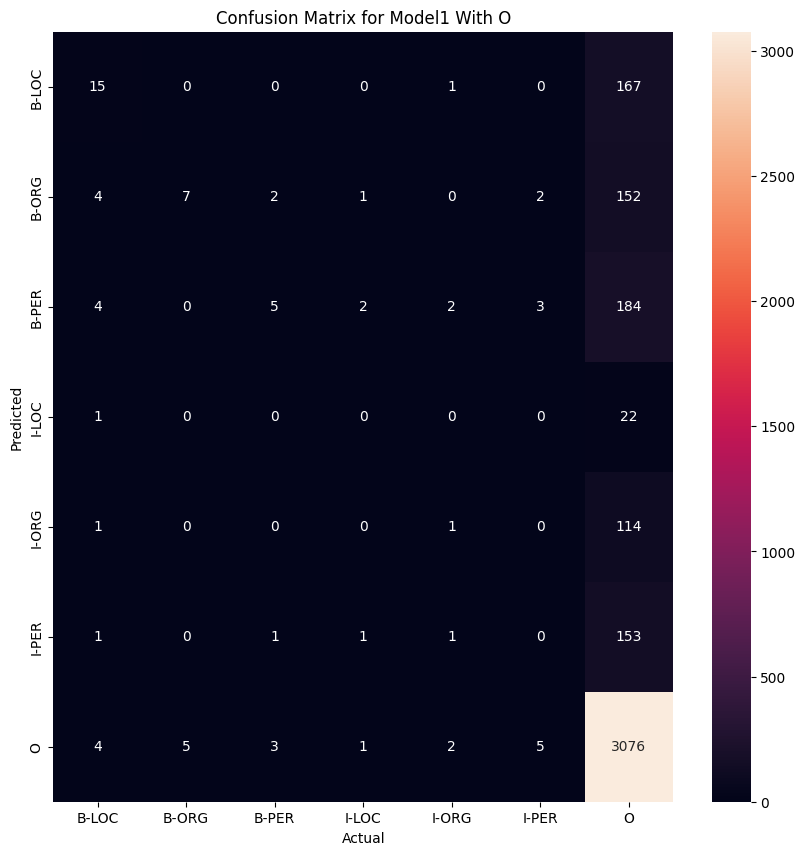

Classification Report Without O For Model1
              precision    recall  f1-score   support

       B-LOC       0.58      0.94      0.71        16
       B-ORG       1.00      0.44      0.61        16
       B-PER       0.62      0.31      0.42        16
       I-LOC       0.00      0.00      0.00         1
       I-ORG       0.20      0.50      0.29         2
       I-PER       0.00      0.00      0.00         4

    accuracy                           0.51        55
   macro avg       0.40      0.36      0.34        55
weighted avg       0.65      0.51      0.52        55




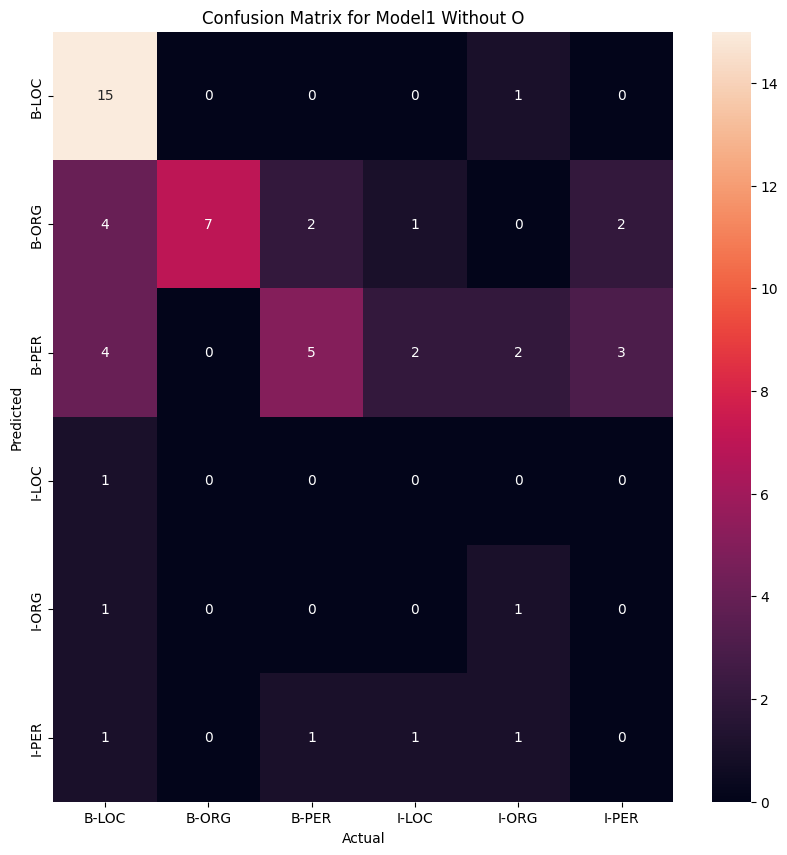

Epochs: 100%|██████████| 5/5 [00:08<00:00,  1.74s/it]


Classification Report With O For Model2
              precision    recall  f1-score   support

       B-LOC       0.60      0.03      0.06       183
       B-ORG       0.00      0.00      0.00       168
       B-PER       0.78      0.04      0.07       200
       I-LOC       0.00      0.00      0.00        23
       I-ORG       0.00      0.00      0.00       116
       I-PER       0.47      0.10      0.17       157
           O       0.80      1.00      0.89      3096

    accuracy                           0.79      3943
   macro avg       0.38      0.17      0.17      3943
weighted avg       0.71      0.79      0.71      3943




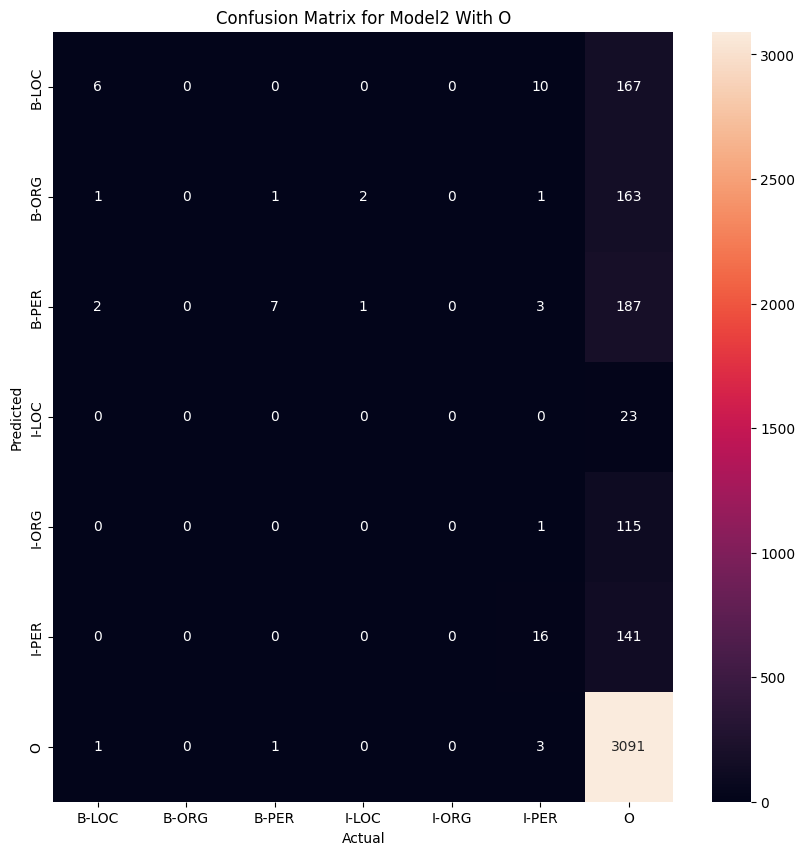

Classification Report Without O For Model2
              precision    recall  f1-score   support

       B-LOC       0.67      0.38      0.48        16
       B-ORG       0.00      0.00      0.00         5
       B-PER       0.88      0.54      0.67        13
       I-LOC       0.00      0.00      0.00         0
       I-ORG       0.00      0.00      0.00         1
       I-PER       0.52      1.00      0.68        16

    accuracy                           0.57        51
   macro avg       0.34      0.32      0.30        51
weighted avg       0.59      0.57      0.53        51




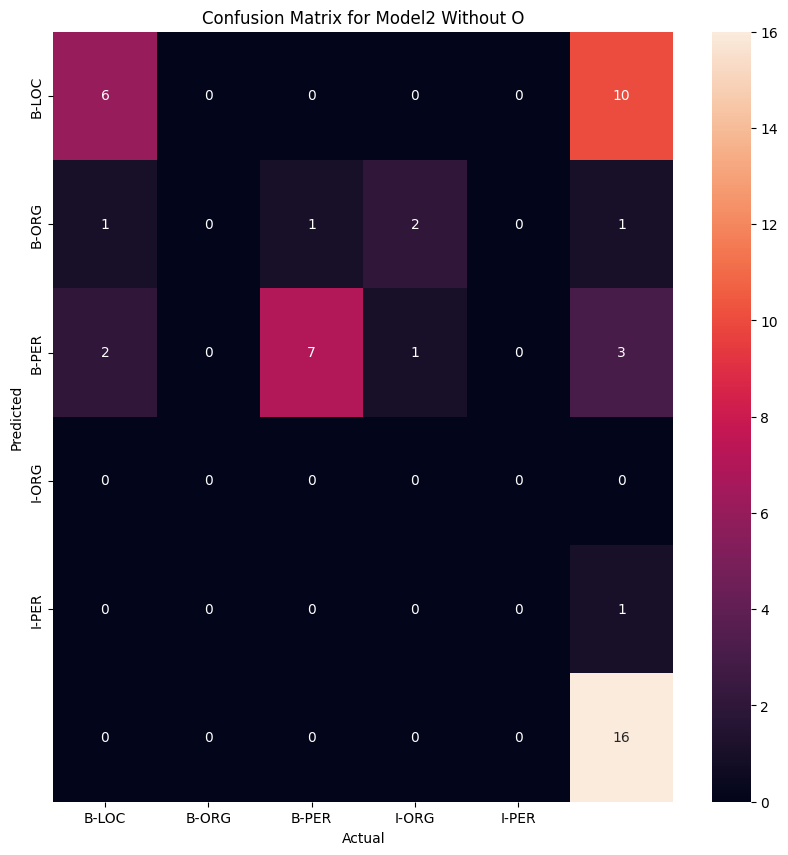

Epochs: 100%|██████████| 5/5 [00:12<00:00,  2.49s/it]


Classification Report With O For Model3
              precision    recall  f1-score   support

       B-LOC       0.00      0.00      0.00       183
       B-ORG       0.00      0.00      0.00       168
       B-PER       0.00      0.00      0.00       200
       I-LOC       0.00      0.00      0.00        23
       I-ORG       0.00      0.00      0.00       116
       I-PER       0.33      0.01      0.01       157
           O       0.79      1.00      0.88      3096

    accuracy                           0.79      3943
   macro avg       0.16      0.14      0.13      3943
weighted avg       0.63      0.79      0.69      3943




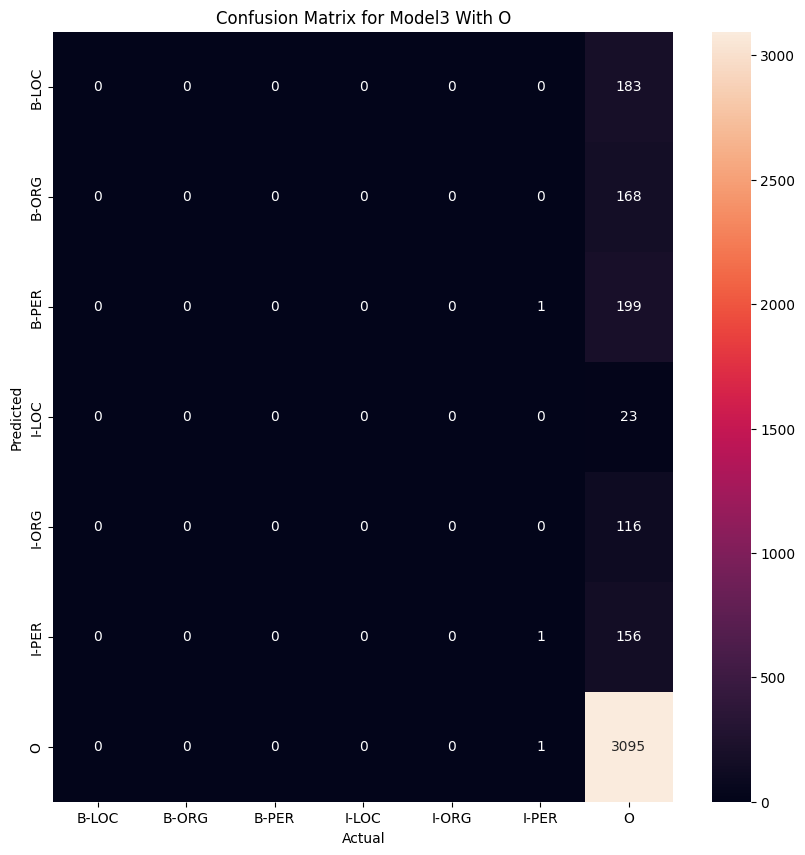

Classification Report Without O For Model3
              precision    recall  f1-score   support

       B-PER       0.00      0.00      0.00         1
       I-PER       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2




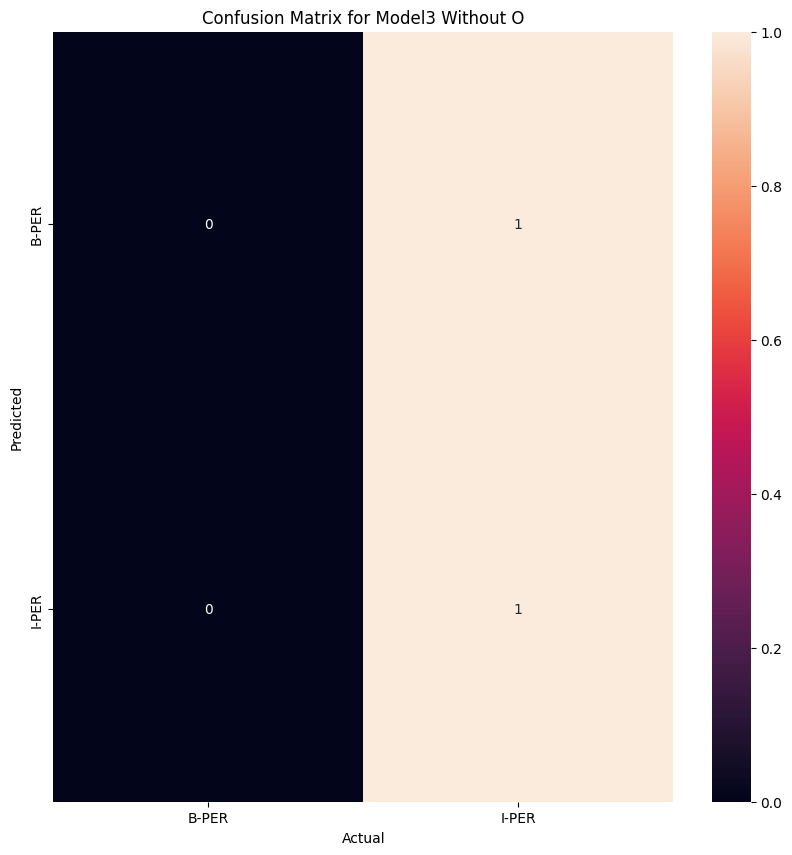

Epochs: 100%|██████████| 5/5 [00:08<00:00,  1.63s/it]


Classification Report With O For Model4
              precision    recall  f1-score   support

       B-LOC       0.72      0.33      0.45       183
       B-ORG       0.61      0.15      0.24       168
       B-PER       0.73      0.30      0.43       200
       I-LOC       0.00      0.00      0.00        23
       I-ORG       0.00      0.00      0.00       116
       I-PER       0.72      0.37      0.49       157
           O       0.84      0.99      0.91      3096

    accuracy                           0.83      3943
   macro avg       0.52      0.31      0.36      3943
weighted avg       0.78      0.83      0.79      3943




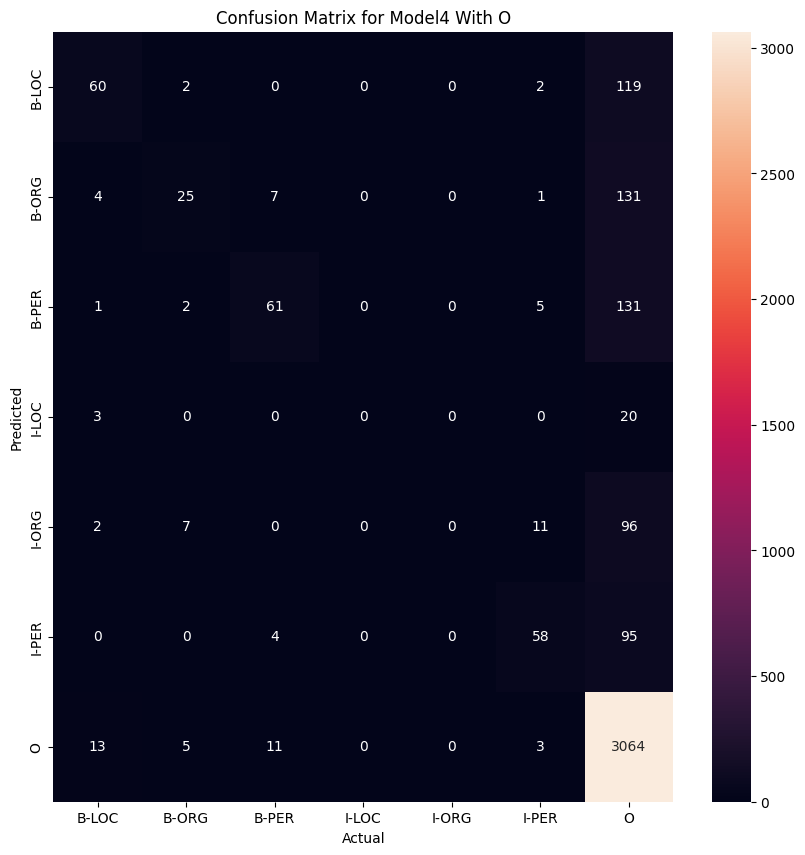

Classification Report Without O For Model4
              precision    recall  f1-score   support

       B-LOC       0.86      0.94      0.90        64
       B-ORG       0.69      0.68      0.68        37
       B-PER       0.85      0.88      0.87        69
       I-LOC       0.00      0.00      0.00         3
       I-ORG       0.00      0.00      0.00        20
       I-PER       0.75      0.94      0.83        62

    accuracy                           0.80       255
   macro avg       0.53      0.57      0.55       255
weighted avg       0.73      0.80      0.76       255




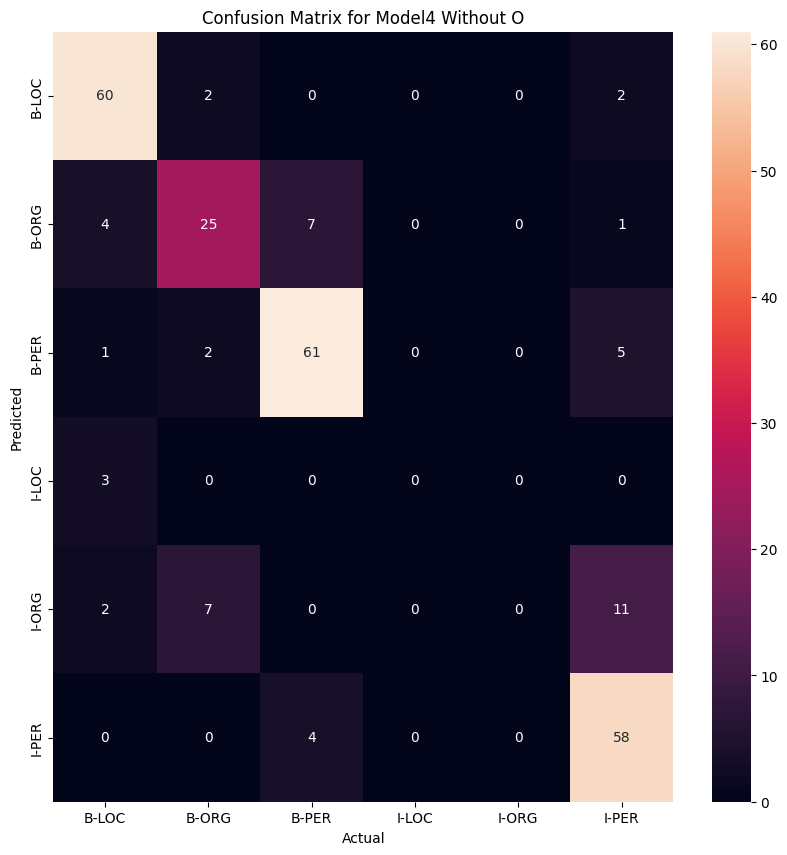

Epochs: 100%|██████████| 5/5 [00:19<00:00,  3.82s/it]


Classification Report With O For Model5
              precision    recall  f1-score   support

       B-LOC       0.54      0.61      0.57       183
       B-ORG       0.54      0.37      0.44       168
       B-PER       0.66      0.58      0.62       200
       I-LOC       0.00      0.00      0.00        23
       I-ORG       0.22      0.40      0.28       116
       I-PER       0.69      0.61      0.65       157
           O       0.92      0.93      0.93      3096

    accuracy                           0.84      3943
   macro avg       0.51      0.50      0.50      3943
weighted avg       0.84      0.84      0.84      3943




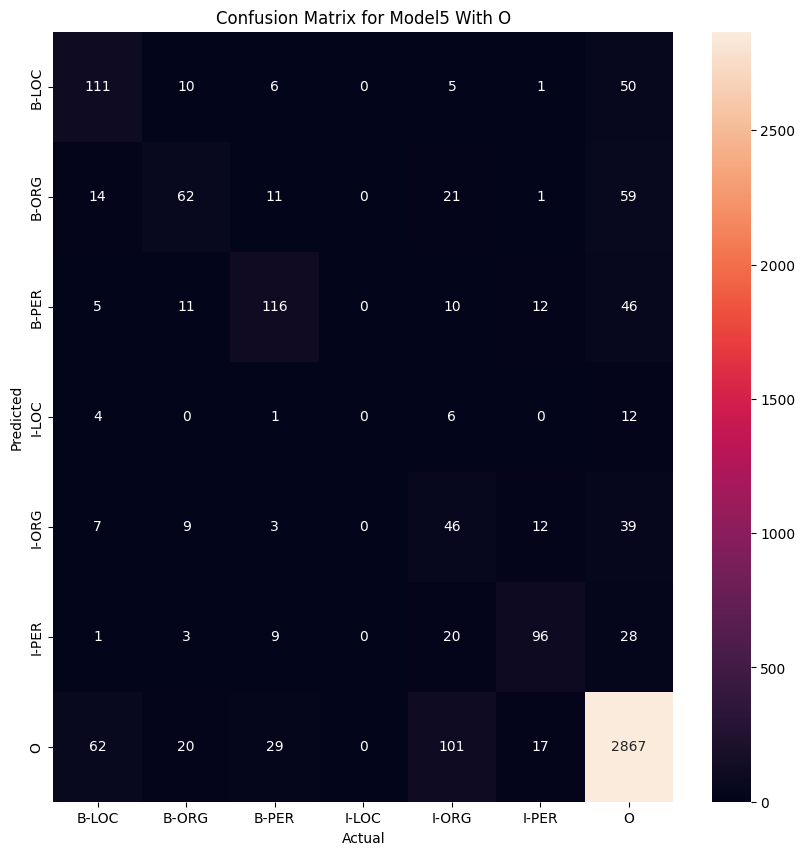

Classification Report Without O For Model5
              precision    recall  f1-score   support

       B-LOC       0.78      0.83      0.81       133
       B-ORG       0.65      0.57      0.61       109
       B-PER       0.79      0.75      0.77       154
       I-LOC       0.00      0.00      0.00        11
       I-ORG       0.43      0.60      0.50        77
       I-PER       0.79      0.74      0.76       129

    accuracy                           0.70       613
   macro avg       0.57      0.58      0.58       613
weighted avg       0.70      0.70      0.70       613




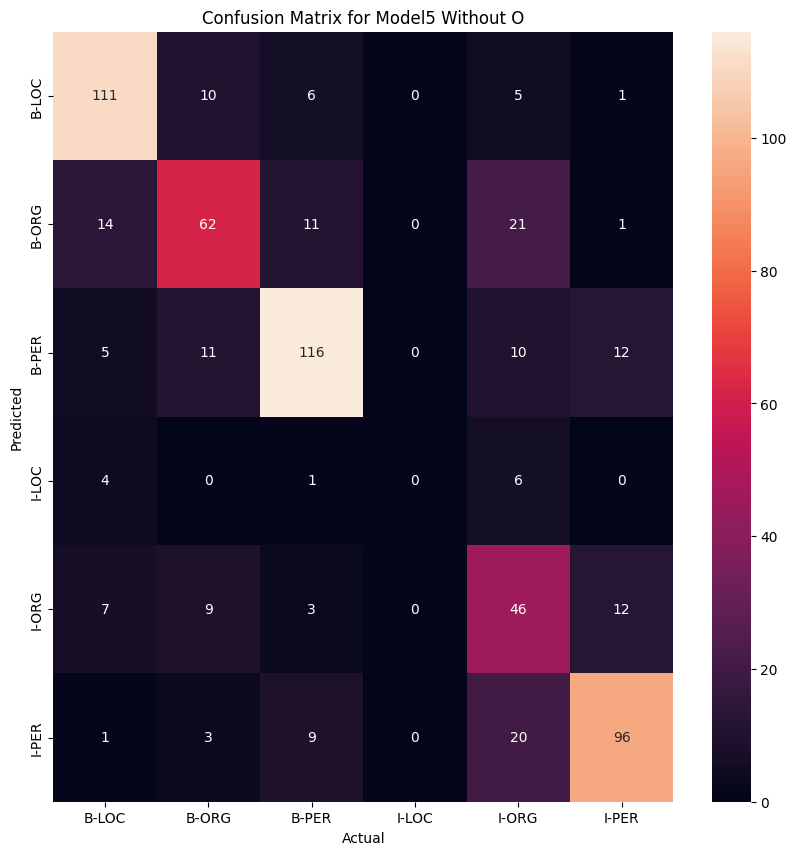

Epochs: 100%|██████████| 5/5 [00:29<00:00,  5.83s/it]


Classification Report With O For Model6
              precision    recall  f1-score   support

       B-LOC       0.76      0.38      0.50       183
       B-ORG       0.55      0.36      0.43       168
       B-PER       0.88      0.29      0.44       200
       I-LOC       0.00      0.00      0.00        23
       I-ORG       0.46      0.09      0.16       116
       I-PER       0.89      0.38      0.53       157
           O       0.86      0.99      0.92      3096

    accuracy                           0.84      3943
   macro avg       0.63      0.36      0.43      3943
weighted avg       0.83      0.84      0.81      3943




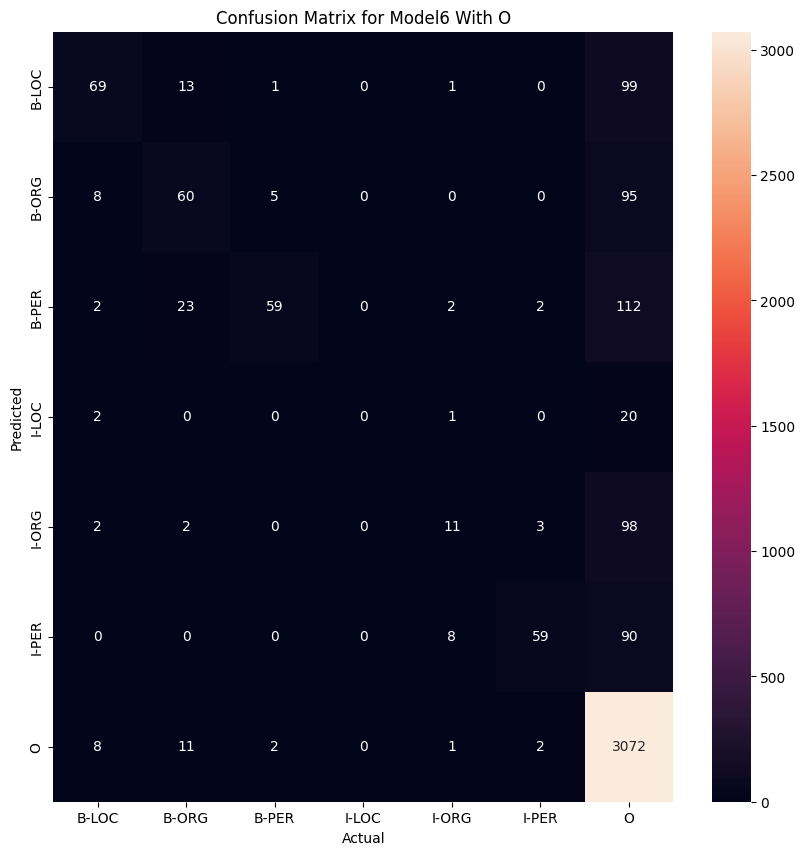

Classification Report Without O For Model6
              precision    recall  f1-score   support

       B-LOC       0.83      0.82      0.83        84
       B-ORG       0.61      0.82      0.70        73
       B-PER       0.91      0.67      0.77        88
       I-LOC       0.00      0.00      0.00         3
       I-ORG       0.48      0.61      0.54        18
       I-PER       0.92      0.88      0.90        67

    accuracy                           0.77       333
   macro avg       0.63      0.63      0.62       333
weighted avg       0.80      0.77      0.78       333




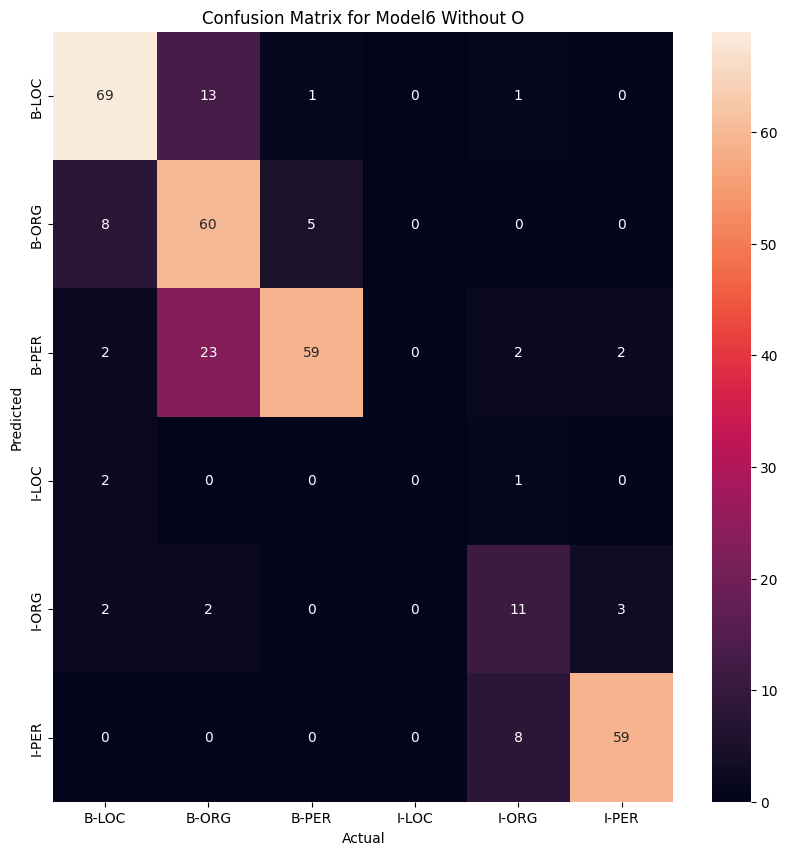

Epochs: 100%|██████████| 5/5 [00:19<00:00,  3.80s/it]


Classification Report With O For Model7
              precision    recall  f1-score   support

       B-LOC       0.70      0.44      0.54       183
       B-ORG       0.78      0.11      0.19       168
       B-PER       0.64      0.45      0.53       200
       I-LOC       0.00      0.00      0.00        23
       I-ORG       0.00      0.00      0.00       116
       I-PER       0.61      0.45      0.52       157
           O       0.86      0.99      0.92      3096

    accuracy                           0.84      3943
   macro avg       0.51      0.35      0.38      3943
weighted avg       0.80      0.84      0.80      3943




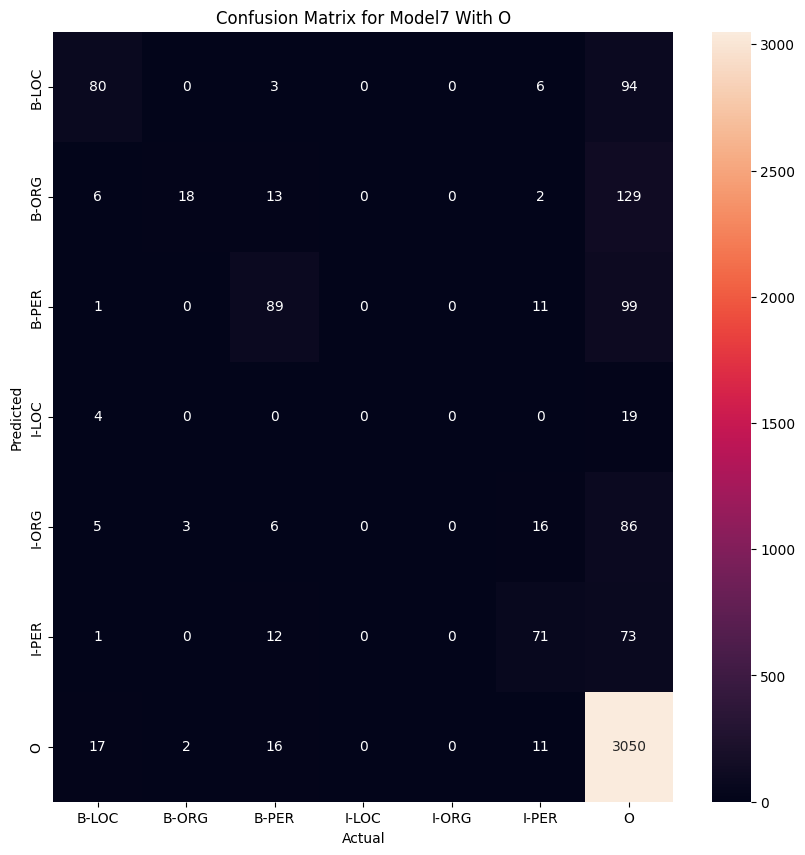

Classification Report Without O For Model7
              precision    recall  f1-score   support

       B-LOC       0.82      0.90      0.86        89
       B-ORG       0.86      0.46      0.60        39
       B-PER       0.72      0.88      0.79       101
       I-LOC       0.00      0.00      0.00         4
       I-ORG       0.00      0.00      0.00        30
       I-PER       0.67      0.85      0.75        84

    accuracy                           0.74       347
   macro avg       0.51      0.51      0.50       347
weighted avg       0.68      0.74      0.70       347




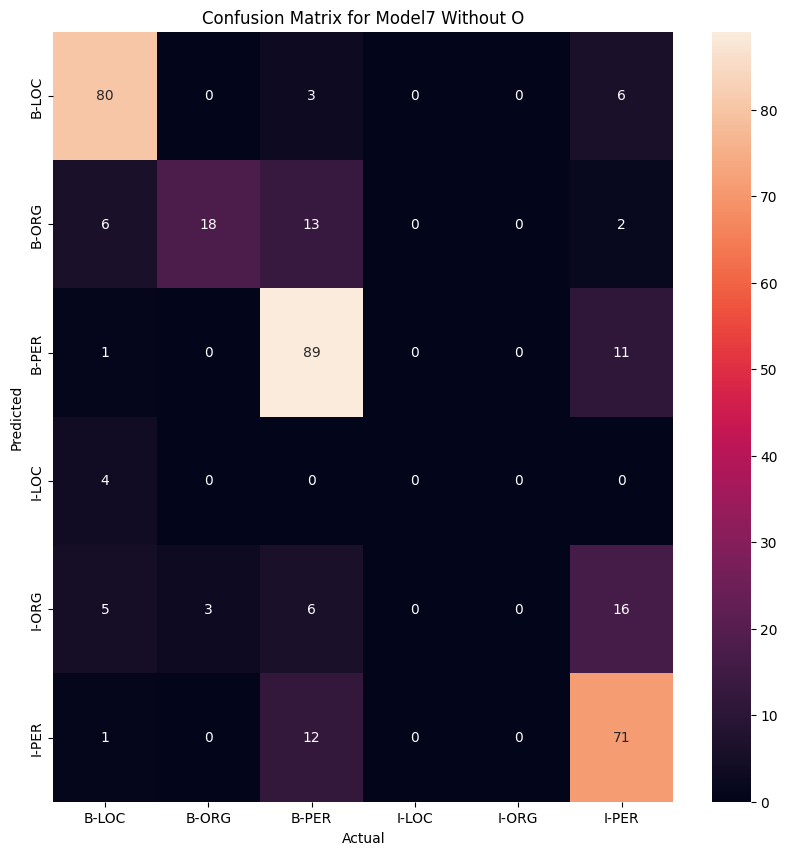

Epochs: 100%|██████████| 5/5 [00:49<00:00,  9.89s/it]


Classification Report With O For Model8
              precision    recall  f1-score   support

       B-LOC       0.81      0.48      0.60       183
       B-ORG       0.73      0.36      0.48       168
       B-PER       0.83      0.62      0.71       200
       I-LOC       0.67      0.09      0.15        23
       I-ORG       0.72      0.20      0.31       116
       I-PER       0.87      0.67      0.76       157
           O       0.89      0.99      0.93      3096

    accuracy                           0.88      3943
   macro avg       0.79      0.49      0.56      3943
weighted avg       0.87      0.88      0.86      3943




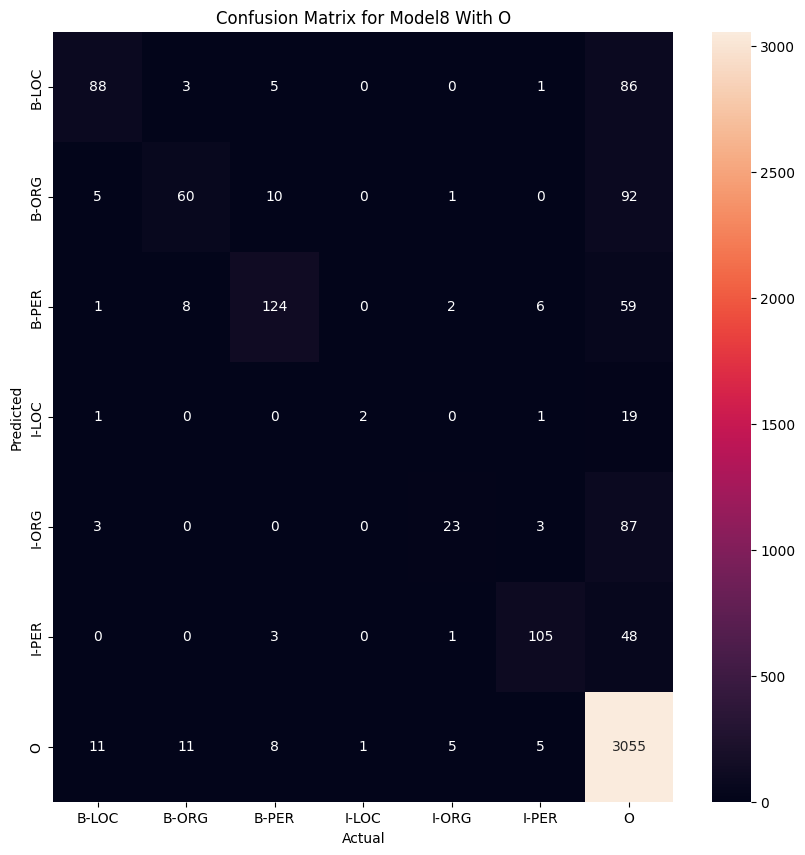

Classification Report Without O For Model8
              precision    recall  f1-score   support

       B-LOC       0.90      0.91      0.90        97
       B-ORG       0.85      0.79      0.82        76
       B-PER       0.87      0.88      0.88       141
       I-LOC       1.00      0.50      0.67         4
       I-ORG       0.85      0.79      0.82        29
       I-PER       0.91      0.96      0.93       109

    accuracy                           0.88       456
   macro avg       0.90      0.81      0.84       456
weighted avg       0.88      0.88      0.88       456




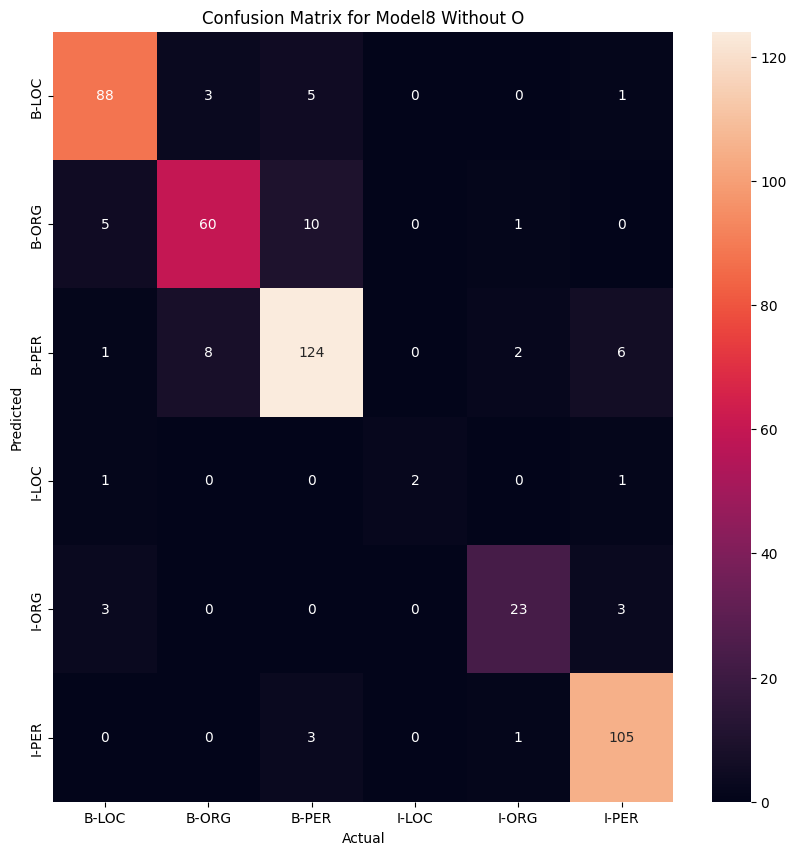

Epochs: 100%|██████████| 5/5 [01:18<00:00, 15.76s/it]


Classification Report With O For Model9
              precision    recall  f1-score   support

       B-LOC       0.87      0.53      0.66       183
       B-ORG       0.85      0.42      0.56       168
       B-PER       0.76      0.61      0.68       200
       I-LOC       1.00      0.26      0.41        23
       I-ORG       0.88      0.20      0.32       116
       I-PER       0.87      0.62      0.72       157
           O       0.89      0.99      0.94      3096

    accuracy                           0.88      3943
   macro avg       0.87      0.52      0.61      3943
weighted avg       0.88      0.88      0.86      3943




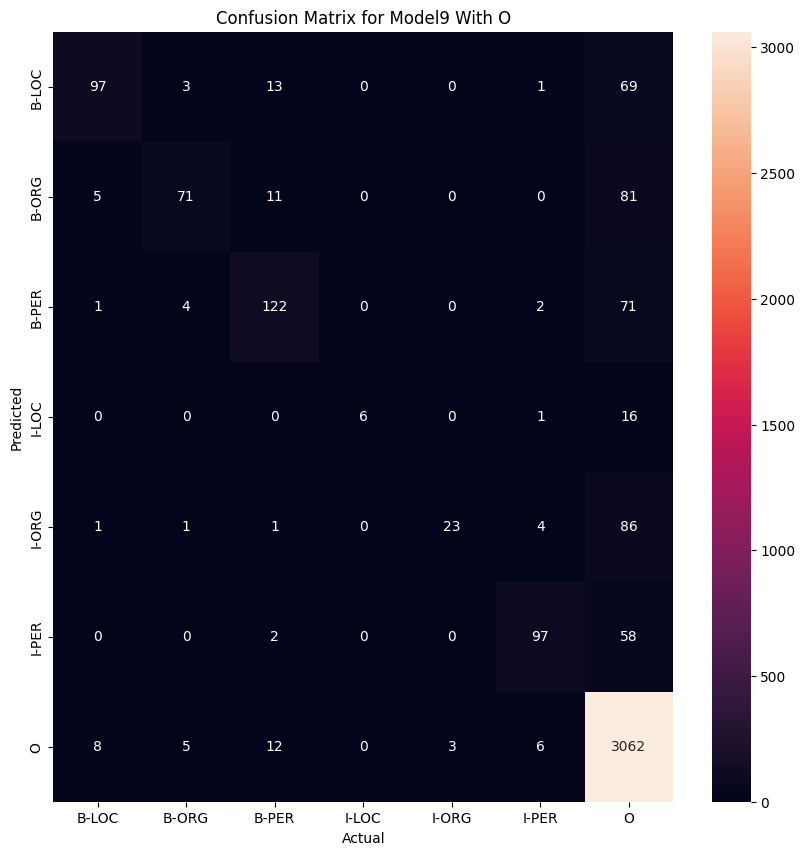

Classification Report Without O For Model9
              precision    recall  f1-score   support

       B-LOC       0.93      0.85      0.89       114
       B-ORG       0.90      0.82      0.86        87
       B-PER       0.82      0.95      0.88       129
       I-LOC       1.00      0.86      0.92         7
       I-ORG       1.00      0.77      0.87        30
       I-PER       0.92      0.98      0.95        99

    accuracy                           0.89       466
   macro avg       0.93      0.87      0.89       466
weighted avg       0.90      0.89      0.89       466




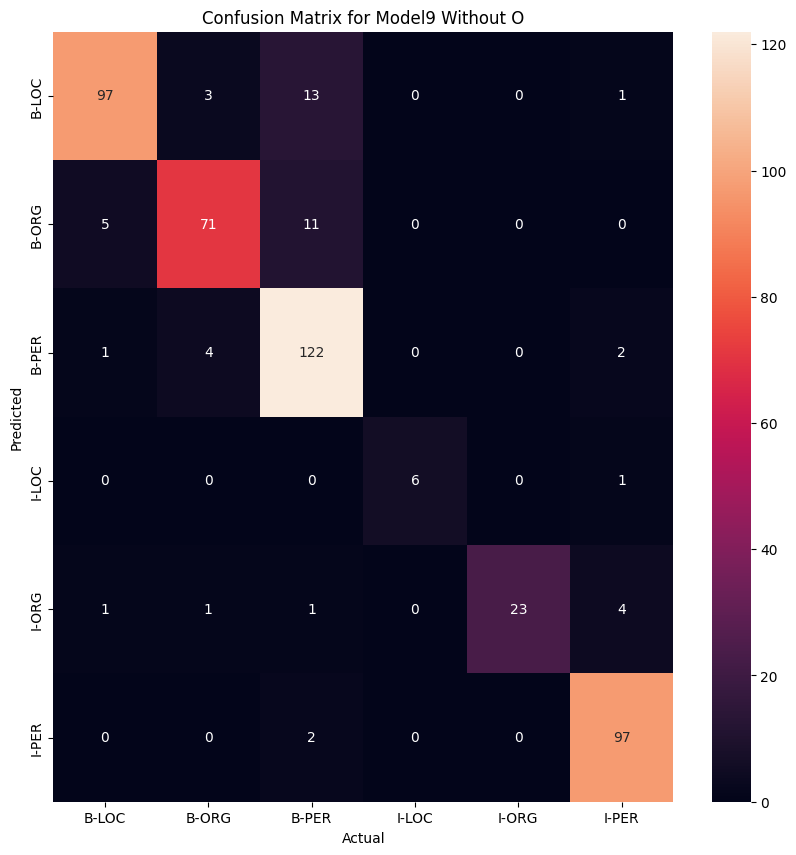

+-----------+---------------+------------+--------------+----------+-------------+--------+---------------+------------------+-----------+
| N_MODEL   |   HIDDEN_SIZE |   N_LAYERS |   DIRECTIONS |   RECALL |   PERCISION |     F1 |   RECALL_WO_O |   PERCISION_WO_O |   F1_WO_O |
|-----------+---------------+------------+--------------+----------+-------------+--------+---------------+------------------+-----------|
| Model1    |           500 |          1 |            1 |   0.7872 |      0.6997 | 0.7064 |        0.5091 |           0.6478 |    0.5165 |
| Model2    |           500 |          2 |            1 |   0.7913 |      0.7104 | 0.7081 |        0.5686 |           0.5941 |    0.5341 |
| Model3    |           500 |          3 |            1 |   0.7852 |      0.6301 | 0.6913 |        0.5000 |           0.2500 |    0.3333 |
| Model4    |           500 |          1 |            2 |   0.8288 |      0.7837 | 0.7851 |        0.8000 |           0.7283 |    0.7612 |
| Model5    |           500

In [ ]:
# Define models with their hyperparameters
models = {
  'Model1': {'embedding_size': EMB_DIM, 'hidden_size': 500, 'n_layers': 1, 'directions': 1},
  'Model2': {'embedding_size': EMB_DIM, 'hidden_size': 500, 'n_layers': 2, 'directions': 1},
  'Model3': {'embedding_size': EMB_DIM, 'hidden_size': 500, 'n_layers': 3, 'directions': 1},
  'Model4': {'embedding_size': EMB_DIM, 'hidden_size': 500, 'n_layers': 1, 'directions': 2},
  'Model5': {'embedding_size': EMB_DIM, 'hidden_size': 500, 'n_layers': 2, 'directions': 2},
  'Model6': {'embedding_size': EMB_DIM, 'hidden_size': 500, 'n_layers': 3, 'directions': 2},
  'Model7': {'embedding_size': EMB_DIM, 'hidden_size': 800, 'n_layers': 1, 'directions': 2},
  'Model8': {'embedding_size': EMB_DIM, 'hidden_size': 800, 'n_layers': 2, 'directions': 2},
  'Model9': {'embedding_size': EMB_DIM, 'hidden_size': 800, 'n_layers': 3, 'directions': 2},
}

# TO DO ----------------------------------------------------------------------
results_dev = []
for model_name, model_params in models.items():
  # train the model
  model = NERNet(vocab.n_words, output_size=vocab.n_tags, **model_params)
  model.to(DEVICE)
  metrics = train_loop(model, n_epochs=N_EPOCHS, dataloader_train=dl_train, dataloader_dev=dl_dev)
  # add the results to the final results list
  result = {
    'N_MODEL': model_name,
    'HIDDEN_SIZE': model_params['hidden_size'],
    'N_LAYERS': model_params['n_layers'],
    'DIRECTIONS': model_params['directions'],
  }
  result.update(evaluate(model, model_name, dl_dev, vocab))
  results_dev.append(result)
  # Save the model at the end
  th.save(model.state_dict(), f"{model_name}.pt")
# TO DO ----------------------------------------------------------------------

# Print results in tabulated format
print(tabulate(results_dev, headers='keys', tablefmt='psql', floatfmt=".4f"))

## Step 3: Evaluate on Test Set
Evaluate your models on the test set and save the results as a CSV. Add this file to your repo for submission.

Classification Report With O For Model1
              precision    recall  f1-score   support

       B-LOC       0.32      0.03      0.06       343
       B-ORG       0.33      0.01      0.02       350
       B-PER       0.35      0.02      0.03       434
       I-LOC       0.00      0.00      0.00        53
       I-ORG       0.14      0.01      0.02       200
       I-PER       0.29      0.02      0.04       296
           O       0.80      1.00      0.89      6567

    accuracy                           0.80      8243
   macro avg       0.32      0.16      0.15      8243
weighted avg       0.70      0.80      0.72      8243




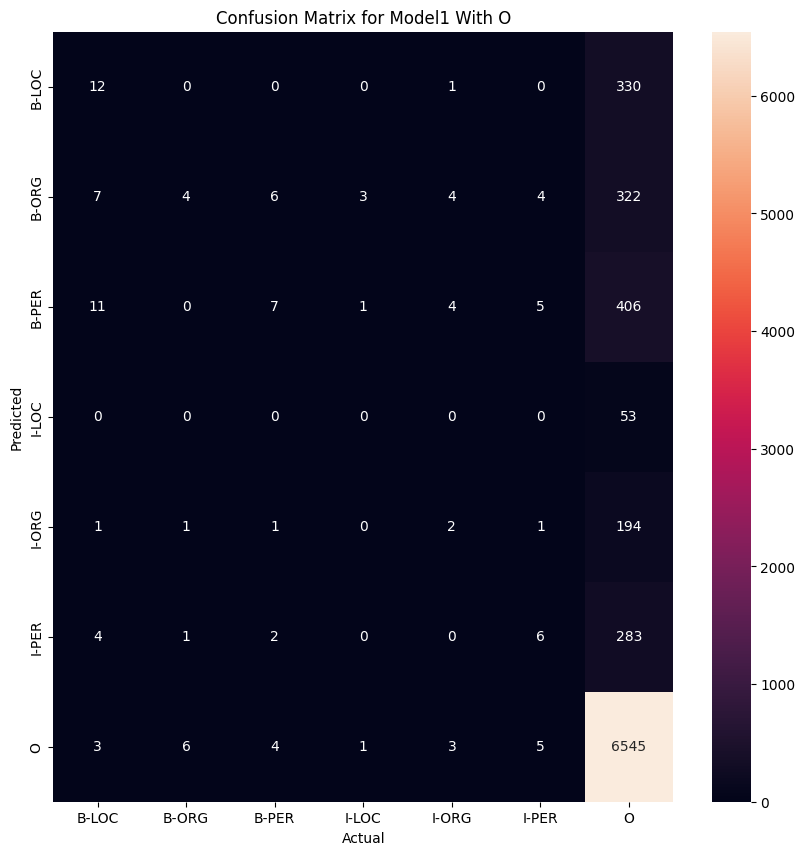

Classification Report Without O For Model1
              precision    recall  f1-score   support

       B-LOC       0.34      0.92      0.50        13
       B-ORG       0.67      0.14      0.24        28
       B-PER       0.44      0.25      0.32        28
       I-LOC       0.00      0.00      0.00         0
       I-ORG       0.18      0.33      0.24         6
       I-PER       0.38      0.46      0.41        13

    accuracy                           0.35        88
   macro avg       0.33      0.35      0.28        88
weighted avg       0.47      0.35      0.33        88




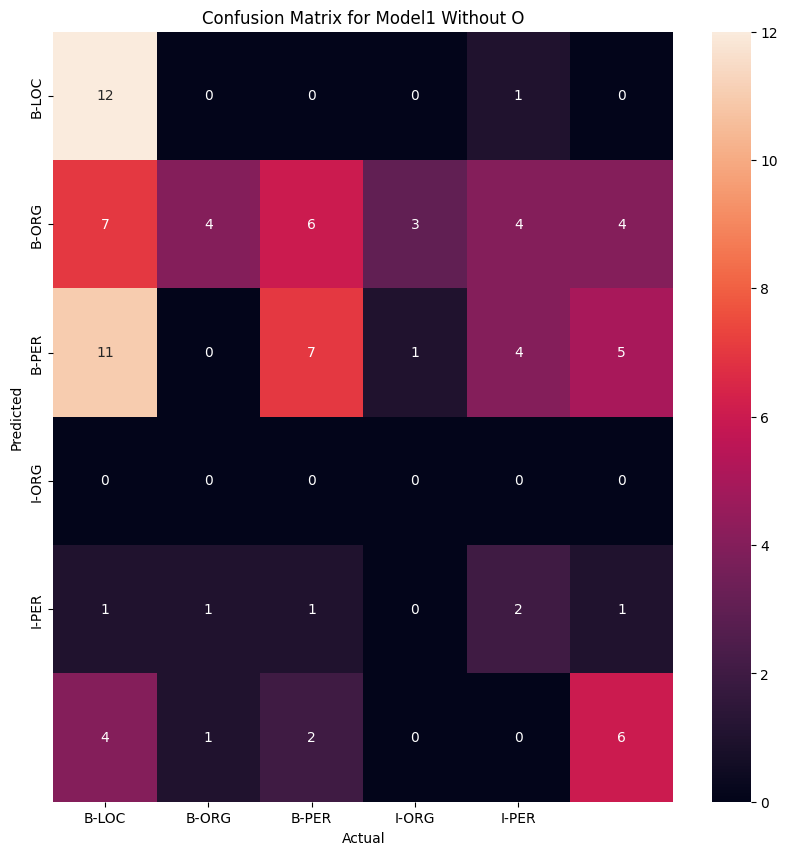

Classification Report With O For Model2
              precision    recall  f1-score   support

       B-LOC       0.52      0.03      0.07       343
       B-ORG       0.00      0.00      0.00       350
       B-PER       0.80      0.04      0.07       434
       I-LOC       0.00      0.00      0.00        53
       I-ORG       0.00      0.00      0.00       200
       I-PER       0.48      0.07      0.12       296
           O       0.80      1.00      0.89      6567

    accuracy                           0.80      8243
   macro avg       0.37      0.16      0.16      8243
weighted avg       0.72      0.80      0.72      8243




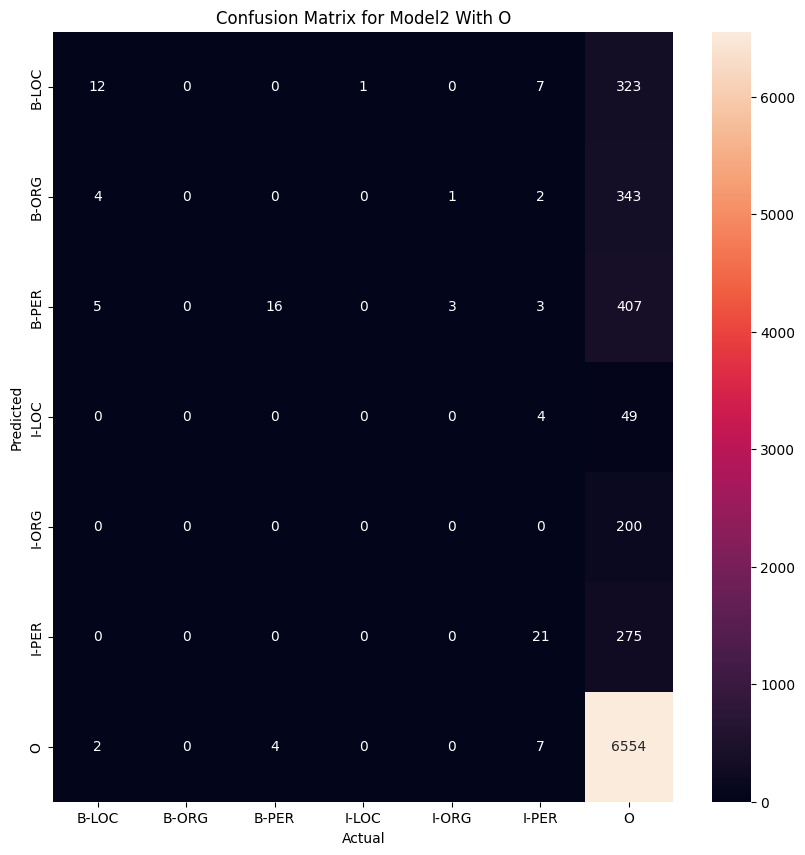

Classification Report Without O For Model2
              precision    recall  f1-score   support

       B-LOC       0.57      0.60      0.59        20
       B-ORG       0.00      0.00      0.00         7
       B-PER       1.00      0.59      0.74        27
       I-LOC       0.00      0.00      0.00         4
       I-ORG       0.00      0.00      0.00         0
       I-PER       0.57      1.00      0.72        21

    accuracy                           0.62        79
   macro avg       0.36      0.37      0.34        79
weighted avg       0.64      0.62      0.60        79




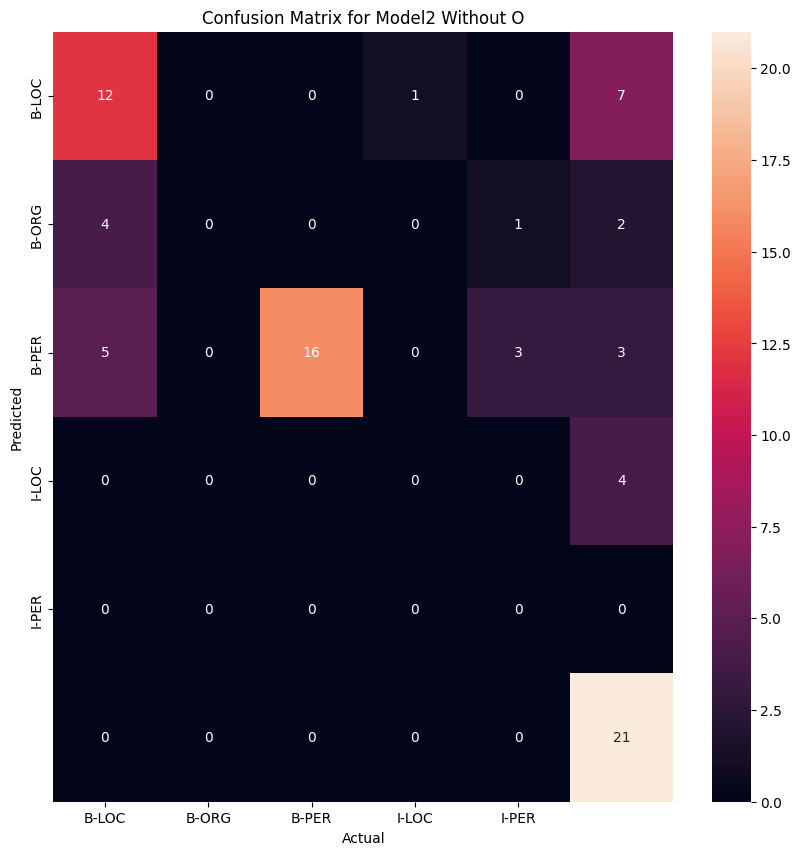

Classification Report With O For Model3
              precision    recall  f1-score   support

       B-LOC       0.00      0.00      0.00       343
       B-ORG       0.00      0.00      0.00       350
       B-PER       0.00      0.00      0.00       434
       I-LOC       0.00      0.00      0.00        53
       I-ORG       0.00      0.00      0.00       200
       I-PER       0.00      0.00      0.00       296
           O       0.80      1.00      0.89      6567

    accuracy                           0.80      8243
   macro avg       0.11      0.14      0.13      8243
weighted avg       0.63      0.80      0.71      8243




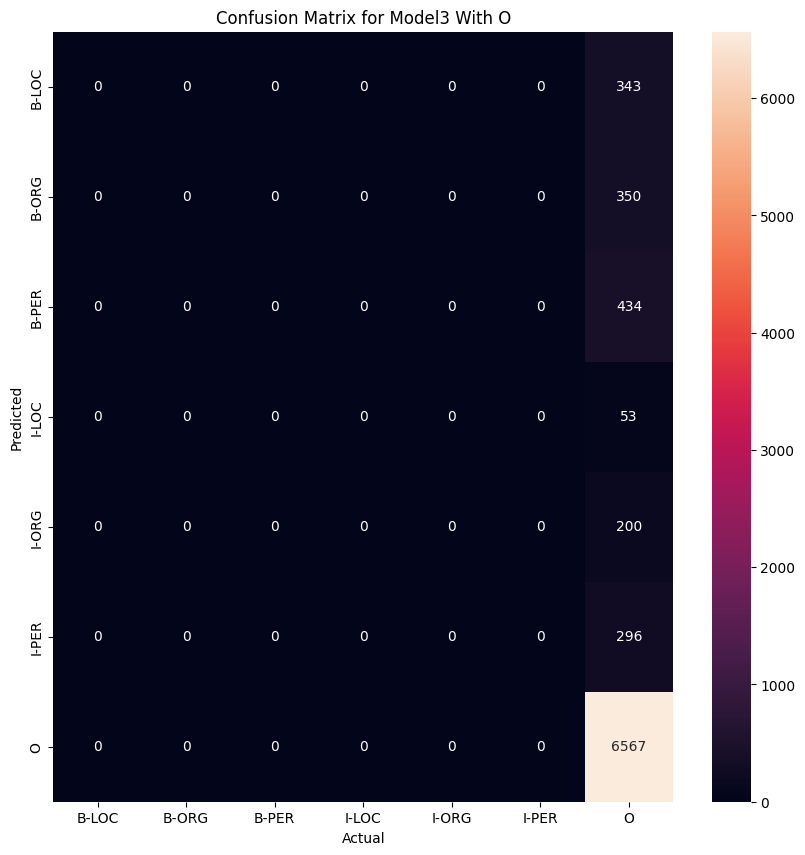

Classification Report With O For Model4
              precision    recall  f1-score   support

       B-LOC       0.67      0.33      0.44       343
       B-ORG       0.59      0.14      0.22       350
       B-PER       0.79      0.33      0.46       434
       I-LOC       0.00      0.00      0.00        53
       I-ORG       0.00      0.00      0.00       200
       I-PER       0.77      0.44      0.56       296
           O       0.85      0.99      0.91      6567

    accuracy                           0.84      8243
   macro avg       0.52      0.32      0.37      8243
weighted avg       0.80      0.84      0.80      8243




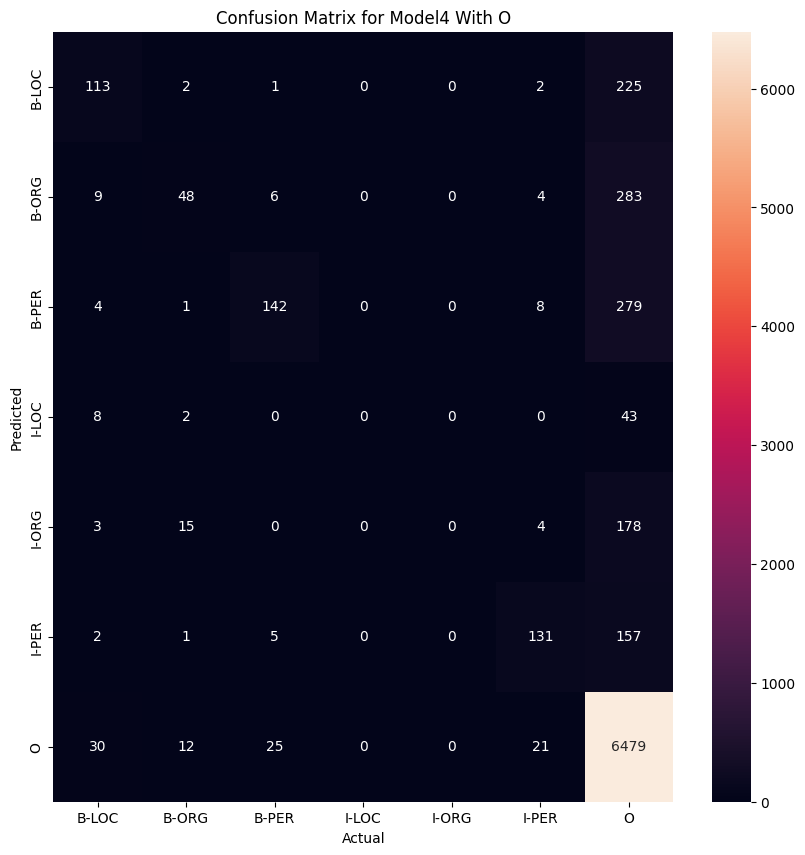

Classification Report Without O For Model4
              precision    recall  f1-score   support

       B-LOC       0.81      0.96      0.88       118
       B-ORG       0.70      0.72      0.71        67
       B-PER       0.92      0.92      0.92       155
       I-LOC       0.00      0.00      0.00        10
       I-ORG       0.00      0.00      0.00        22
       I-PER       0.88      0.94      0.91       139

    accuracy                           0.85       511
   macro avg       0.55      0.59      0.57       511
weighted avg       0.80      0.85      0.82       511




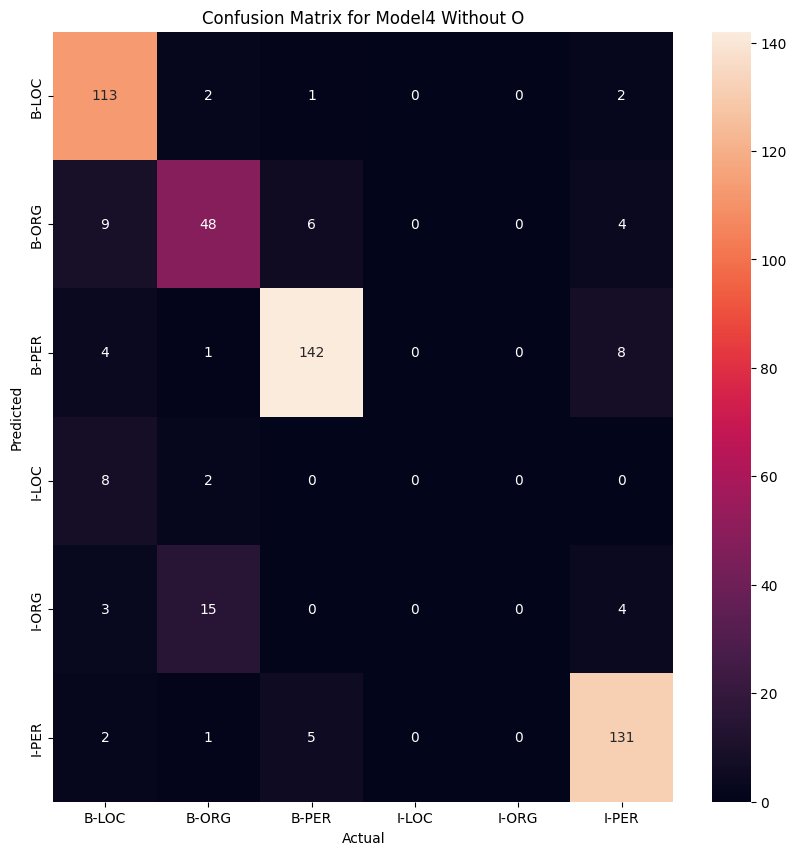

Classification Report With O For Model5
              precision    recall  f1-score   support

       B-LOC       0.50      0.57      0.53       343
       B-ORG       0.62      0.38      0.47       350
       B-PER       0.65      0.55      0.60       434
       I-LOC       0.00      0.00      0.00        53
       I-ORG       0.15      0.34      0.21       200
       I-PER       0.62      0.62      0.62       296
           O       0.92      0.92      0.92      6567

    accuracy                           0.83      8243
   macro avg       0.50      0.48      0.48      8243
weighted avg       0.84      0.83      0.83      8243




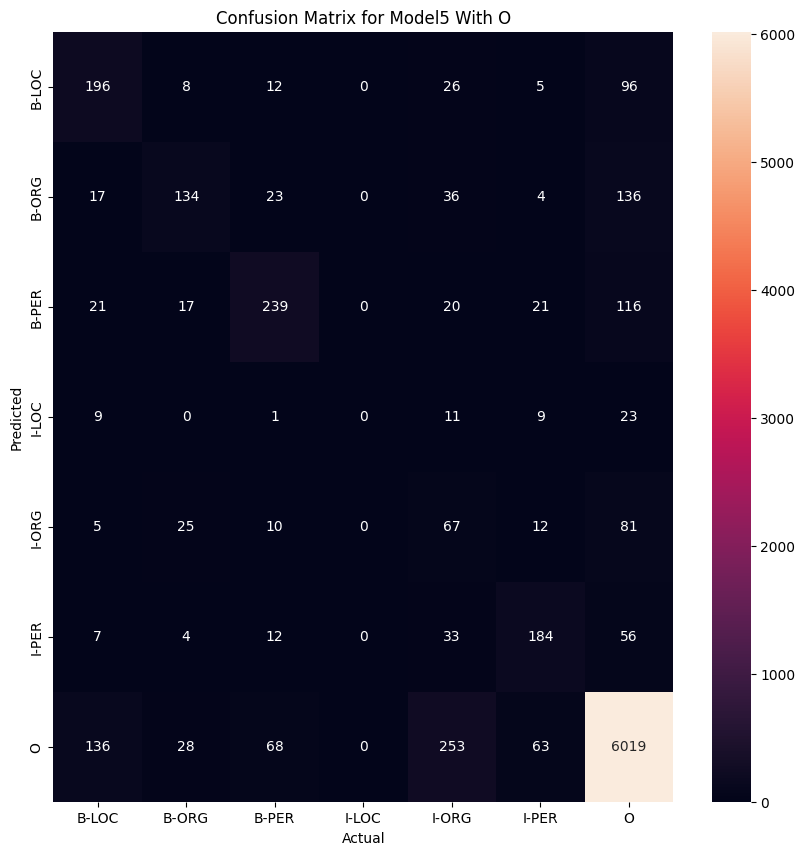

Classification Report Without O For Model5
              precision    recall  f1-score   support

       B-LOC       0.77      0.79      0.78       247
       B-ORG       0.71      0.63      0.67       214
       B-PER       0.80      0.75      0.78       318
       I-LOC       0.00      0.00      0.00        30
       I-ORG       0.35      0.56      0.43       119
       I-PER       0.78      0.77      0.77       240

    accuracy                           0.70      1168
   macro avg       0.57      0.58      0.57      1168
weighted avg       0.71      0.70      0.70      1168




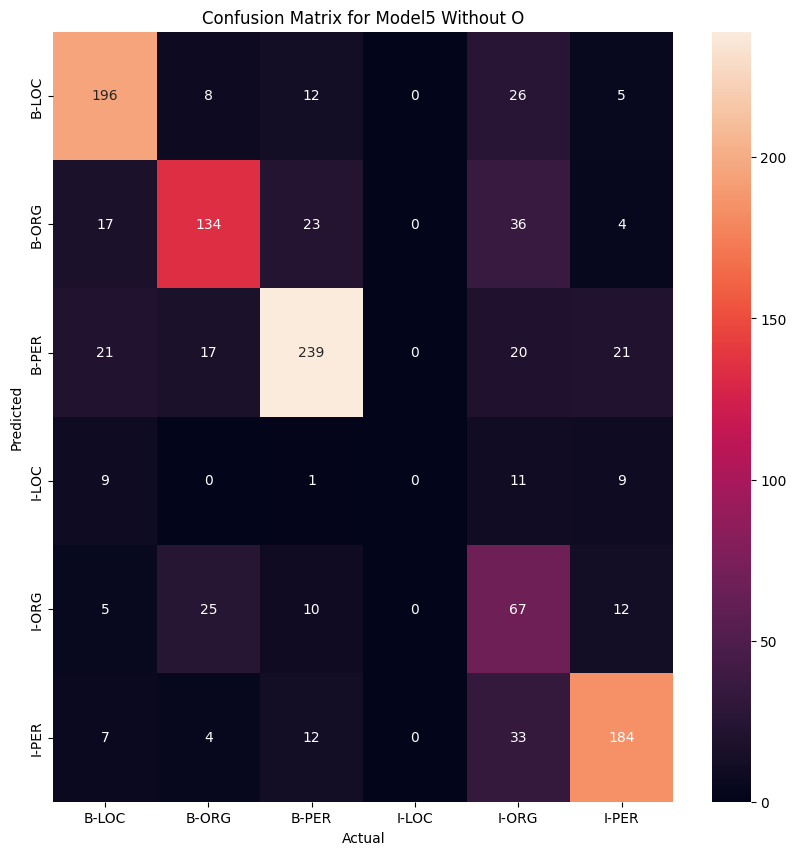

Classification Report With O For Model6
              precision    recall  f1-score   support

       B-LOC       0.74      0.41      0.53       343
       B-ORG       0.64      0.33      0.43       350
       B-PER       0.85      0.26      0.39       434
       I-LOC       0.00      0.00      0.00        53
       I-ORG       0.46      0.09      0.14       200
       I-PER       0.89      0.40      0.55       296
           O       0.86      0.99      0.92      6567

    accuracy                           0.85      8243
   macro avg       0.63      0.35      0.42      8243
weighted avg       0.83      0.85      0.82      8243




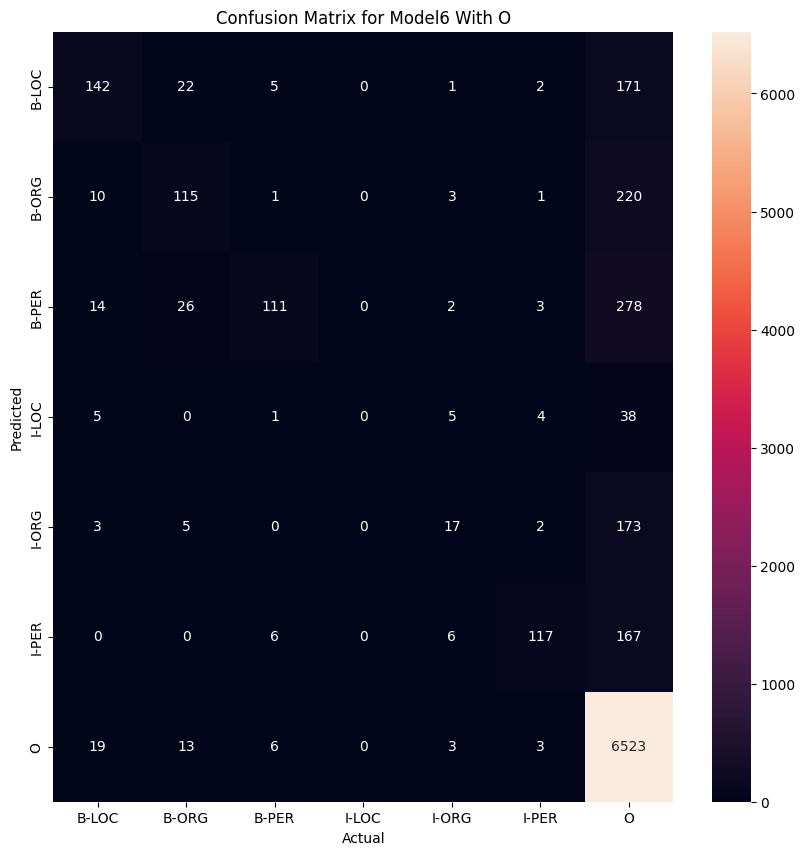

Classification Report Without O For Model6
              precision    recall  f1-score   support

       B-LOC       0.82      0.83      0.82       172
       B-ORG       0.68      0.88      0.77       130
       B-PER       0.90      0.71      0.79       156
       I-LOC       0.00      0.00      0.00        15
       I-ORG       0.50      0.63      0.56        27
       I-PER       0.91      0.91      0.91       129

    accuracy                           0.80       629
   macro avg       0.63      0.66      0.64       629
weighted avg       0.79      0.80      0.79       629




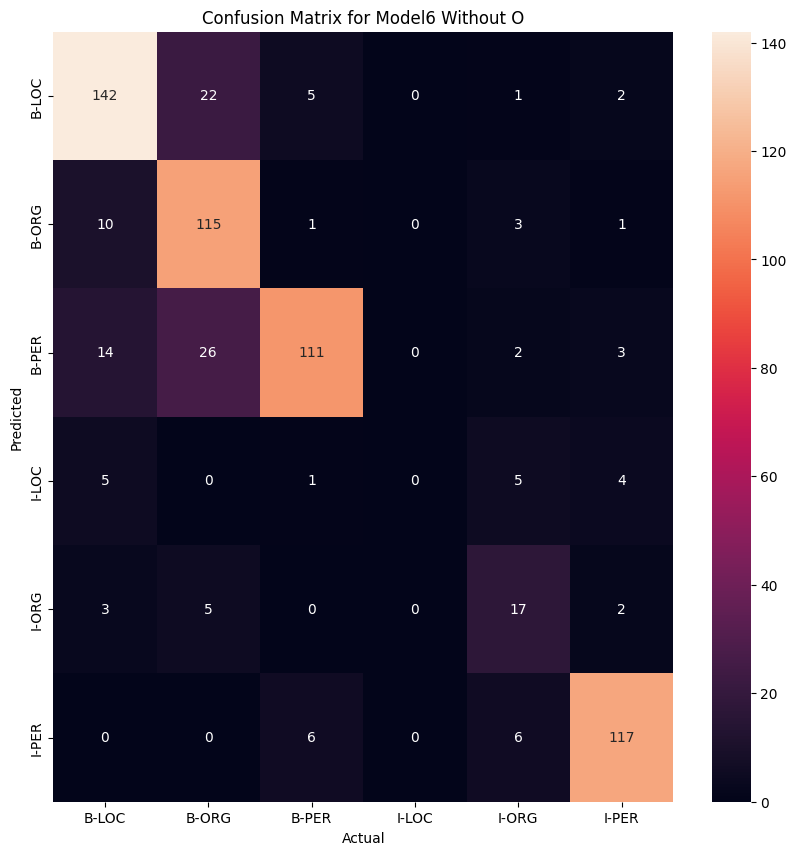

Classification Report With O For Model7
              precision    recall  f1-score   support

       B-LOC       0.60      0.40      0.48       343
       B-ORG       0.77      0.09      0.15       350
       B-PER       0.69      0.44      0.54       434
       I-LOC       0.00      0.00      0.00        53
       I-ORG       1.00      0.01      0.01       200
       I-PER       0.65      0.52      0.58       296
           O       0.86      0.98      0.92      6567

    accuracy                           0.84      8243
   macro avg       0.65      0.35      0.38      8243
weighted avg       0.83      0.84      0.81      8243




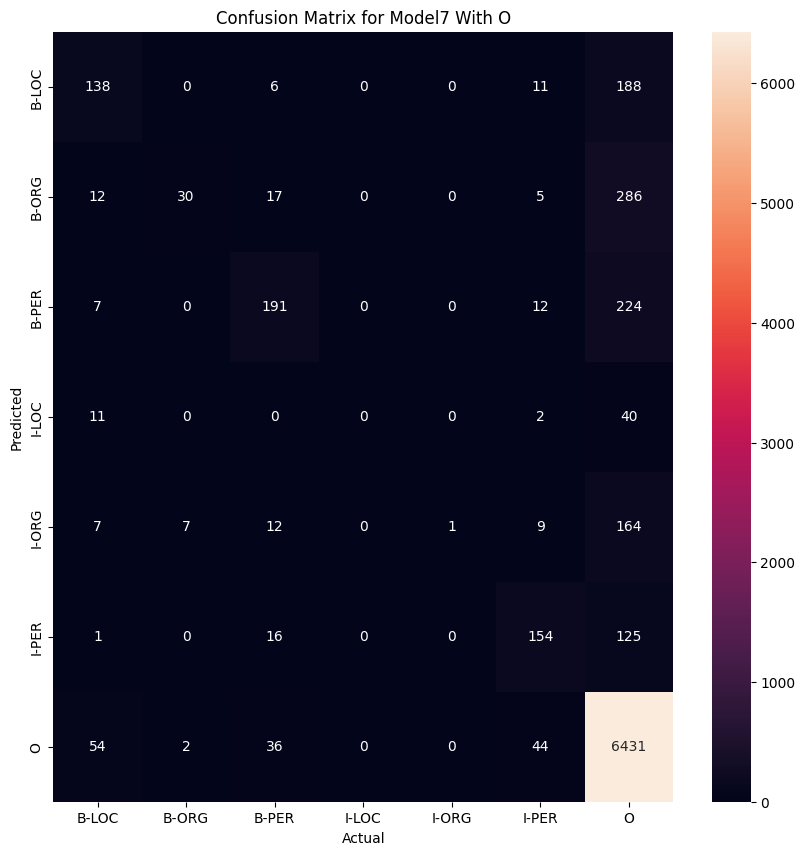

Classification Report Without O For Model7
              precision    recall  f1-score   support

       B-LOC       0.78      0.89      0.83       155
       B-ORG       0.81      0.47      0.59        64
       B-PER       0.79      0.91      0.85       210
       I-LOC       0.00      0.00      0.00        13
       I-ORG       1.00      0.03      0.05        36
       I-PER       0.80      0.90      0.85       171

    accuracy                           0.79       649
   macro avg       0.70      0.53      0.53       649
weighted avg       0.79      0.79      0.76       649




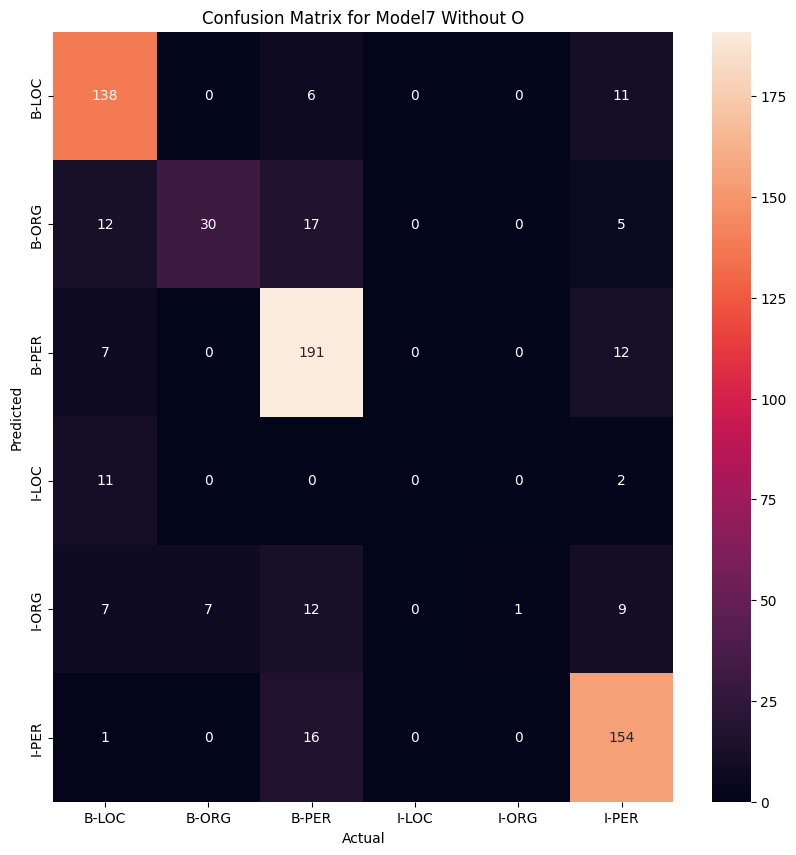

Classification Report With O For Model8
              precision    recall  f1-score   support

       B-LOC       0.82      0.55      0.66       343
       B-ORG       0.81      0.35      0.48       350
       B-PER       0.81      0.56      0.66       434
       I-LOC       0.86      0.11      0.20        53
       I-ORG       0.52      0.17      0.25       200
       I-PER       0.81      0.66      0.72       296
           O       0.89      0.98      0.93      6567

    accuracy                           0.88      8243
   macro avg       0.79      0.48      0.56      8243
weighted avg       0.87      0.88      0.86      8243




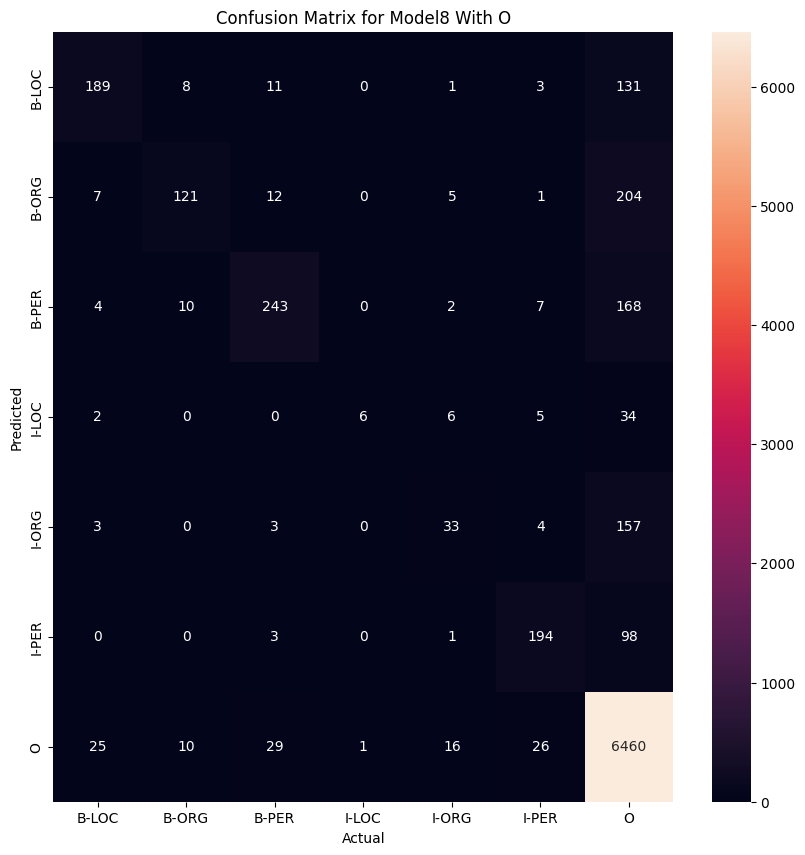

Classification Report Without O For Model8
              precision    recall  f1-score   support

       B-LOC       0.92      0.89      0.91       212
       B-ORG       0.87      0.83      0.85       146
       B-PER       0.89      0.91      0.90       266
       I-LOC       1.00      0.32      0.48        19
       I-ORG       0.69      0.77      0.73        43
       I-PER       0.91      0.98      0.94       198

    accuracy                           0.89       884
   macro avg       0.88      0.78      0.80       884
weighted avg       0.89      0.89      0.89       884




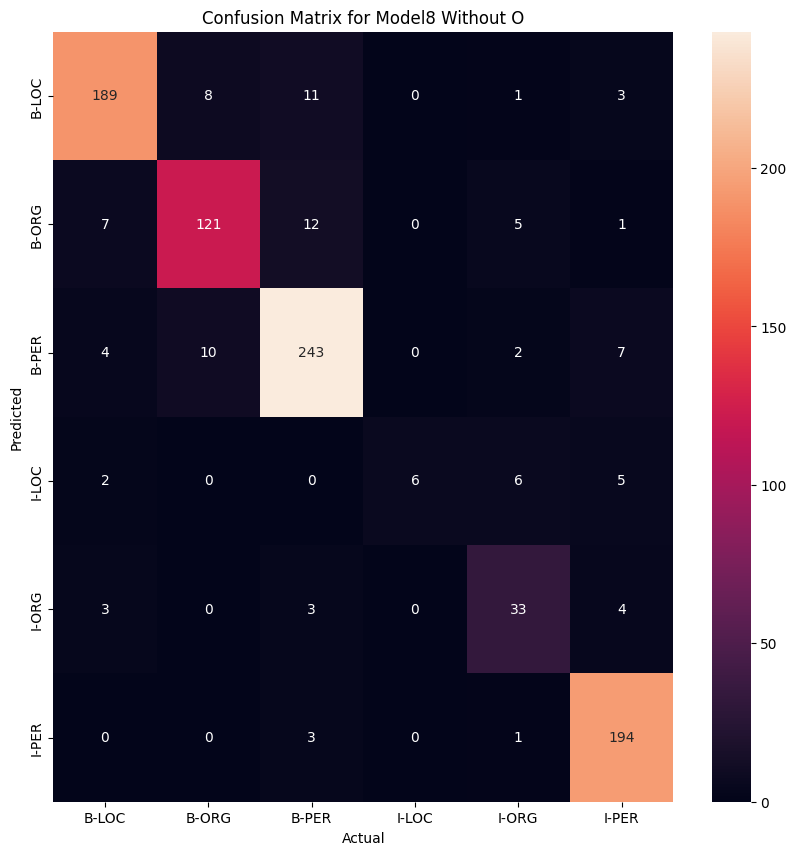

Classification Report With O For Model9
              precision    recall  f1-score   support

       B-LOC       0.82      0.56      0.66       343
       B-ORG       0.88      0.35      0.50       350
       B-PER       0.76      0.54      0.63       434
       I-LOC       0.94      0.30      0.46        53
       I-ORG       0.78      0.15      0.26       200
       I-PER       0.83      0.62      0.71       296
           O       0.89      0.99      0.94      6567

    accuracy                           0.88      8243
   macro avg       0.84      0.50      0.59      8243
weighted avg       0.88      0.88      0.86      8243




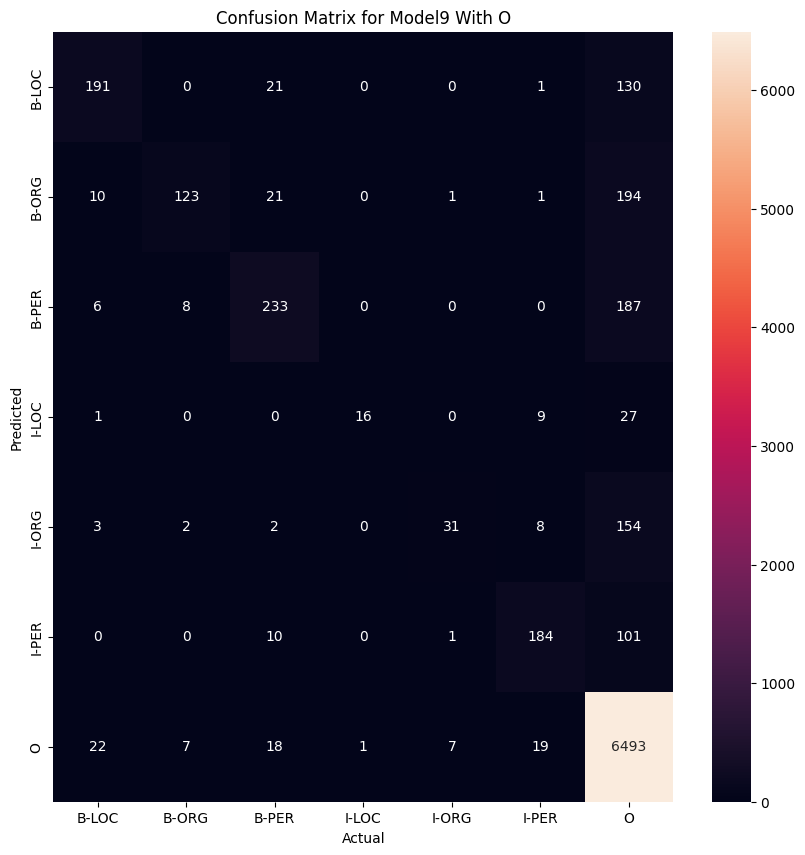

Classification Report Without O For Model9
              precision    recall  f1-score   support

       B-LOC       0.91      0.90      0.90       213
       B-ORG       0.92      0.79      0.85       156
       B-PER       0.81      0.94      0.87       247
       I-LOC       1.00      0.62      0.76        26
       I-ORG       0.94      0.67      0.78        46
       I-PER       0.91      0.94      0.92       195

    accuracy                           0.88       883
   macro avg       0.91      0.81      0.85       883
weighted avg       0.89      0.88      0.88       883




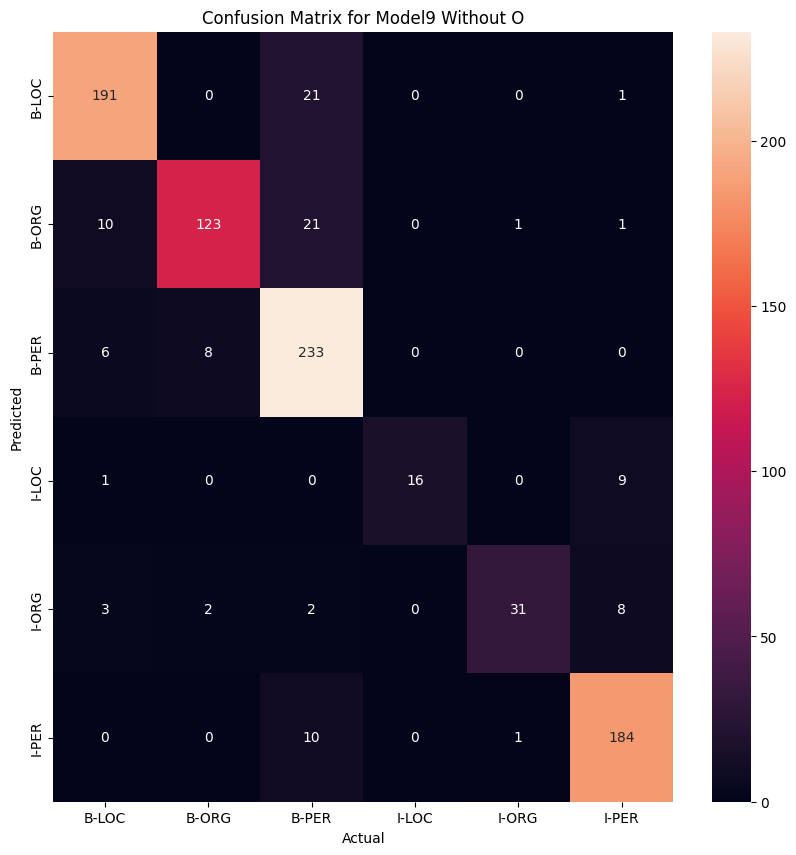

+----+-----------+---------------+------------+--------------+----------+-------------+--------+---------------+------------------+-----------+
|    | N_MODEL   |   HIDDEN_SIZE |   N_LAYERS |   DIRECTIONS |   RECALL |   PERCISION |     F1 |   RECALL_WO_O |   PERCISION_WO_O |   F1_WO_O |
|----+-----------+---------------+------------+--------------+----------+-------------+--------+---------------+------------------+-----------|
|  0 | Model1    |           500 |          1 |            1 |   0.7872 |      0.6997 | 0.7064 |        0.5091 |           0.6478 |    0.5165 |
|  1 | Model2    |           500 |          2 |            1 |   0.7913 |      0.7104 | 0.7081 |        0.5686 |           0.5941 |    0.5341 |
|  2 | Model3    |           500 |          3 |            1 |   0.7852 |      0.6301 | 0.6913 |        0.5000 |           0.2500 |    0.3333 |
|  3 | Model4    |           500 |          1 |            2 |   0.8288 |      0.7837 | 0.7851 |        0.8000 |           0.7283 |    0

In [ ]:
file_name = "NER_results.csv"
# TO DO ----------------------------------------------------------------------
for model_name, model_params in models.items():
  model = NERNet(vocab.n_words, output_size=vocab.n_tags, **model_params)
  model.to(DEVICE)
  # Load the model from harddisk
  model.load_state_dict(th.load(f"{model_name}.pt"))
  # add the results
  result = {
    'N_MODEL': model_name,
    'HIDDEN_SIZE': model_params['hidden_size'],
    'N_LAYERS': model_params['n_layers'],
    'DIRECTIONS': model_params['directions'],
  }
  result.update(evaluate(model, model_name, dl_test, vocab))
  results_dev.append(result)
results = pd.DataFrame(results_dev)
results.to_csv(file_name, index=False)
# TO DO ----------------------------------------------------------------------

print(tabulate(results, headers='keys', tablefmt='psql',floatfmt=".4f"))


## Step 4 - best model
Decide which model performs the best, write its configuration, train it for 5 more epochs and evaluate it on the test set.

The best model is Model9 with F1 score of 0.8649372774360593


Epochs: 100%|██████████| 5/5 [01:19<00:00, 15.94s/it]


Classification Report With O For Model9
              precision    recall  f1-score   support

       B-LOC       0.78      0.74      0.76       343
       B-ORG       0.82      0.52      0.64       350
       B-PER       0.82      0.63      0.71       434
       I-LOC       0.89      0.58      0.70        53
       I-ORG       0.86      0.30      0.44       200
       I-PER       0.94      0.66      0.77       296
           O       0.92      0.99      0.96      6567

    accuracy                           0.91      8243
   macro avg       0.86      0.63      0.71      8243
weighted avg       0.91      0.91      0.90      8243




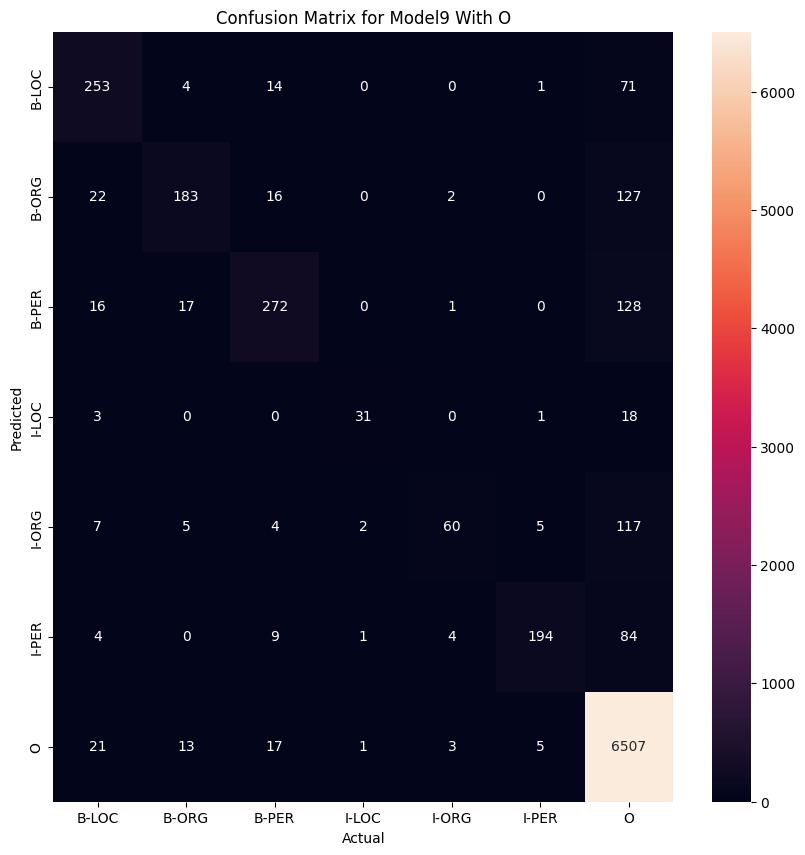

Classification Report Without O For Model9
              precision    recall  f1-score   support

       B-LOC       0.83      0.93      0.88       272
       B-ORG       0.88      0.82      0.85       223
       B-PER       0.86      0.89      0.88       306
       I-LOC       0.91      0.89      0.90        35
       I-ORG       0.90      0.72      0.80        83
       I-PER       0.97      0.92      0.94       212

    accuracy                           0.88      1131
   macro avg       0.89      0.86      0.87      1131
weighted avg       0.88      0.88      0.88      1131




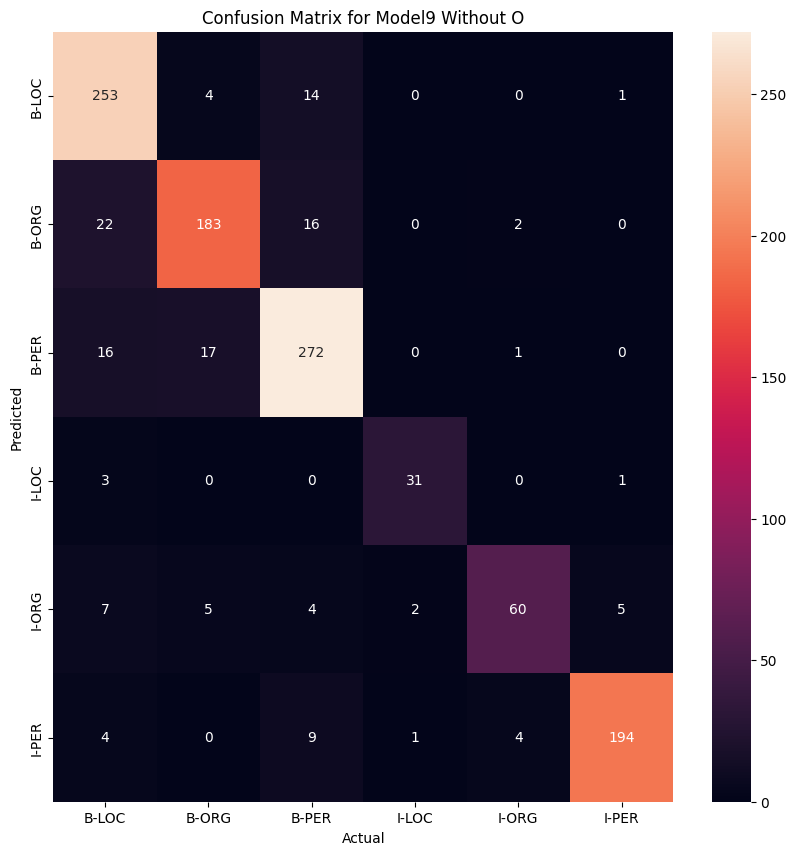

{'RECALL': 0.9098629139876259, 'PERCISION': 0.9058454464108179, 'F1': 0.9003861066237201, 'RECALL_WO_O': 0.8779840848806366, 'PERCISION_WO_O': 0.8806102674449451, 'F1_WO_O': 0.8775731224046975}


In [ ]:
best_model_cfg = {'embedding_size':EMB_DIM, 'hidden_size': -1, 'n_layers': -1, 'directions': -1}
# TO DO ----------------------------------------------------------------------
# Find the best model, using the best F1 score
best_model_name = results.loc[results['F1'].idxmax()]['N_MODEL']
best_model_cfg = models[best_model_name]
print(f'The best model is {best_model_name} with F1 score of {results["F1"].max()}')
# load the best model
model = NERNet(vocab.n_words, output_size=vocab.n_tags, **best_model_cfg)
model.to(DEVICE)
model.load_state_dict(th.load(f"{best_model_name}.pt"))
# train it for 5 more epochs
metrics = train_loop(model, n_epochs=5, dataloader_train=dl_train, dataloader_dev=dl_dev)
# evaluate it on the test set
results = evaluate(model, best_model_name, dl_test, vocab)
print(results)

<br><br><br><br><br>

# Part 4 - Pretrained Embeddings



To prepare for this task, please read [this discussion](https://discuss.pytorch.org/t/can-we-use-pre-trained-word-embeddings-for-weight-initialization-in-nn-embedding/1222).

**TIP**: Ensure that the vectors are aligned with the IDs in your vocabulary. In other words, make sure that the word with ID 0 corresponds to the first vector in the GloVe matrix used to initialize `nn.Embedding`.



## Step 1: Get Data



Download the GloVe embeddings from [this link](https://nlp.stanford.edu/projects/glove/). Use the 300-dimensional vectors from `glove.6B.zip`.



In [ ]:
# TO DO ----------------------------------------------------------------------
!wget -q --no-check-certificate 'https://nlp.stanford.edu/data/glove.6B.zip' -O glove.6B.zip

# Unzip the GloVe dataset
!unzip -q glove.6B.zip

# TO DO ----------------------------------------------------------------------

## Step 2: Inject Embeddings

Then intialize the `nn.Embedding` module in your `NERNet` with these embeddings, so that you can start your training with pre-trained vectors.

In [ ]:
def get_emb_matrix(filepath: str, vocab: Vocab) -> np.ndarray:
  emb_matrix = np.zeros((len(vocab.word2id), 300))
  # TO DO ----------------------------------------------------------------------
  with open(filepath, 'r') as f:
    for line in f:
      word, *emb = line.strip().split()
      if word in vocab.word2id:
        emb_matrix[vocab.word2id[word]] = np.array(emb, dtype=np.float32)


  # TO DO ----------------------------------------------------------------------
  return emb_matrix

In [ ]:
def initialize_from_pretrained_emb(model: NERNet, emb_matrix: np.ndarray):
  """
  Inject the pretrained embeddings into the model.
  :param model: model instance
  :param emb_matrix: pretrained embeddings
  """
  # TO DO ----------------------------------------------------------------------
  with th.no_grad():
    model.embedding.weight = nn.Parameter(th.tensor(emb_matrix))

  # TO DO ----------------------------------------------------------------------

In [ ]:
# Read embeddings and inject them to a model
emb_file = 'glove.6B.300d.txt'
emb_matrix = get_emb_matrix(emb_file, vocab)
ner_glove = NERNet(input_size=vocab.n_words, embedding_size=EMB_DIM, hidden_size=500, output_size=vocab.n_tags, n_layers=1, directions=1)
initialize_from_pretrained_emb(ner_glove, emb_matrix)

## Step 3: Evaluate on Test Set

Same as the evaluation process before, please display:

1. Print a `RECALL-PERCISION-F1` scores in a tabulate format.
2. Display a `confusion matrix` plot: where the predicted labels are the rows, and the true labels are the columns.

Make sure to use the title for the plot, axis names, and the names of the tags on the X-axis.

Make sure to download and upload this CSV as well.

Epochs: 100%|██████████| 5/5 [00:05<00:00,  1.01s/it]


Classification Report With O For Model1
              precision    recall  f1-score   support

       B-LOC       0.74      0.18      0.29       343
       B-ORG       0.40      0.01      0.02       350
       B-PER       0.33      0.01      0.03       434
       I-LOC       0.00      0.00      0.00        53
       I-ORG       0.00      0.00      0.00       200
       I-PER       0.30      0.01      0.02       296
           O       0.81      1.00      0.89      6567

    accuracy                           0.80      8243
   macro avg       0.37      0.17      0.18      8243
weighted avg       0.72      0.80      0.73      8243




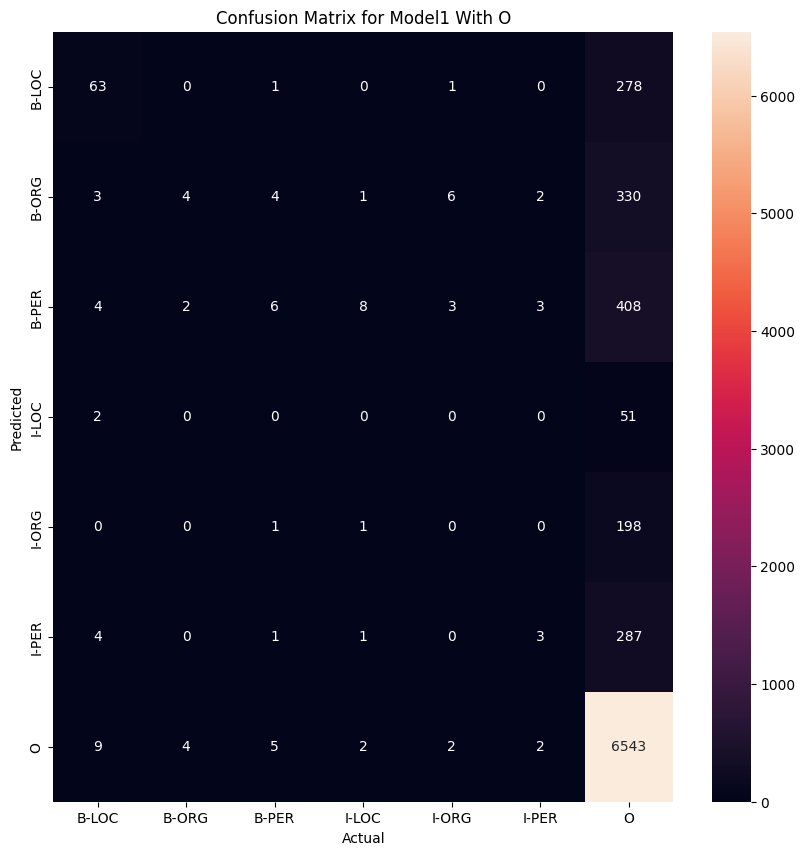

Classification Report Without O For Model1
              precision    recall  f1-score   support

       B-LOC       0.83      0.97      0.89        65
       B-ORG       0.67      0.20      0.31        20
       B-PER       0.46      0.23      0.31        26
       I-LOC       0.00      0.00      0.00         2
       I-ORG       0.00      0.00      0.00         2
       I-PER       0.38      0.33      0.35         9

    accuracy                           0.61       124
   macro avg       0.39      0.29      0.31       124
weighted avg       0.67      0.61      0.61       124




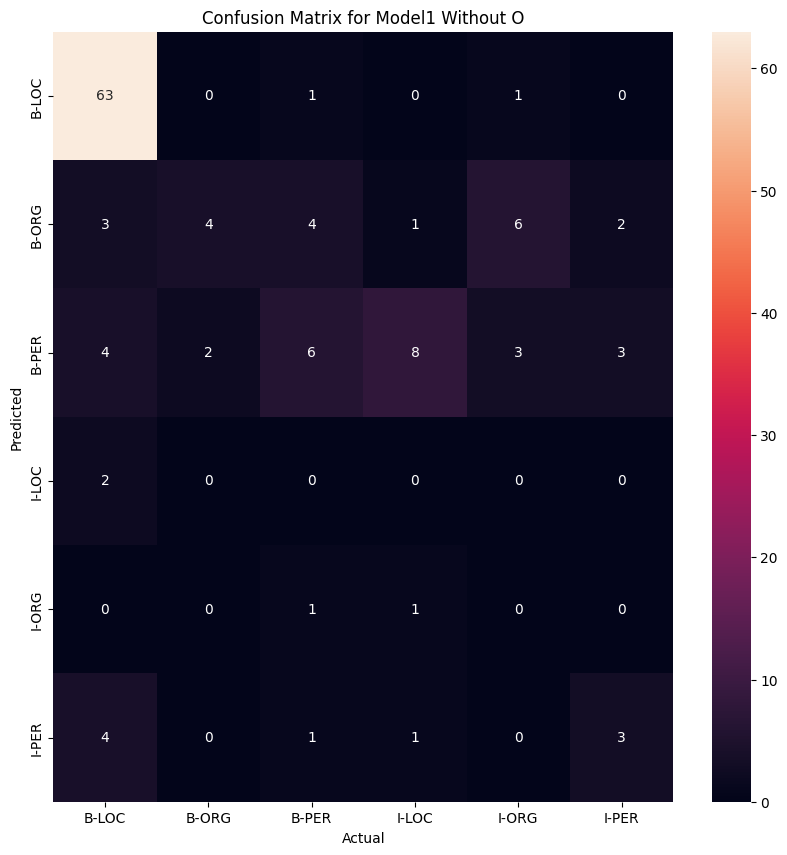

Epochs: 100%|██████████| 5/5 [00:10<00:00,  2.04s/it]


Classification Report With O For Model2
              precision    recall  f1-score   support

       B-LOC       0.81      0.17      0.28       343
       B-ORG       0.00      0.00      0.00       350
       B-PER       0.41      0.03      0.06       434
       I-LOC       0.00      0.00      0.00        53
       I-ORG       0.00      0.00      0.00       200
       I-PER       0.26      0.02      0.04       296
           O       0.81      1.00      0.89      6567

    accuracy                           0.80      8243
   macro avg       0.33      0.17      0.18      8243
weighted avg       0.71      0.80      0.73      8243




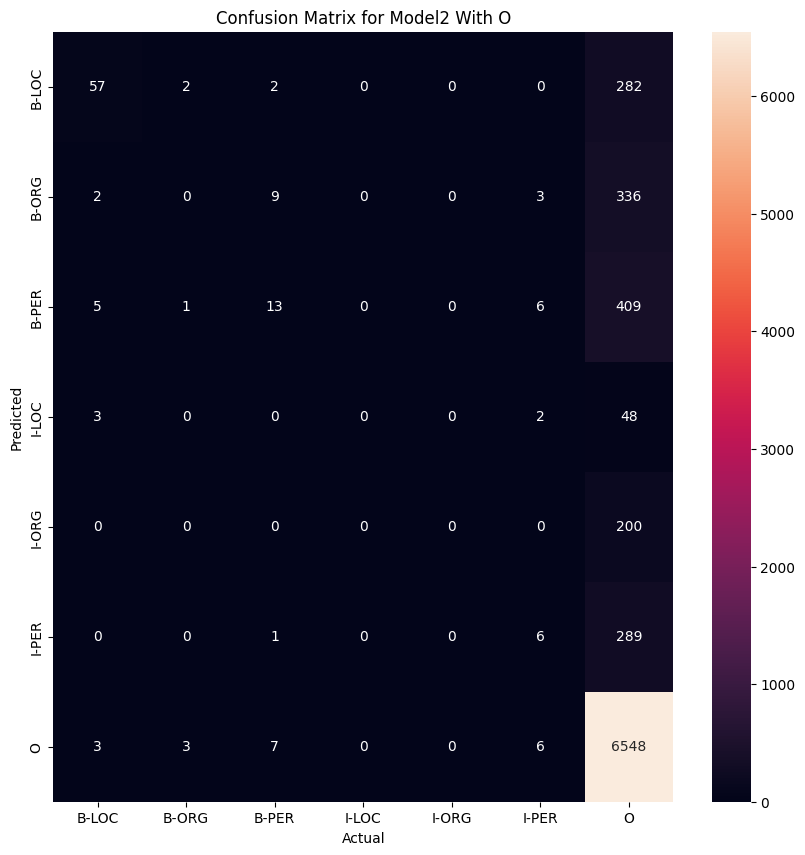

Classification Report Without O For Model2
              precision    recall  f1-score   support

       B-LOC       0.85      0.93      0.89        61
       B-ORG       0.00      0.00      0.00        14
       B-PER       0.52      0.52      0.52        25
       I-LOC       0.00      0.00      0.00         5
       I-PER       0.35      0.86      0.50         7

    accuracy                           0.68       112
   macro avg       0.34      0.46      0.38       112
weighted avg       0.60      0.68      0.63       112




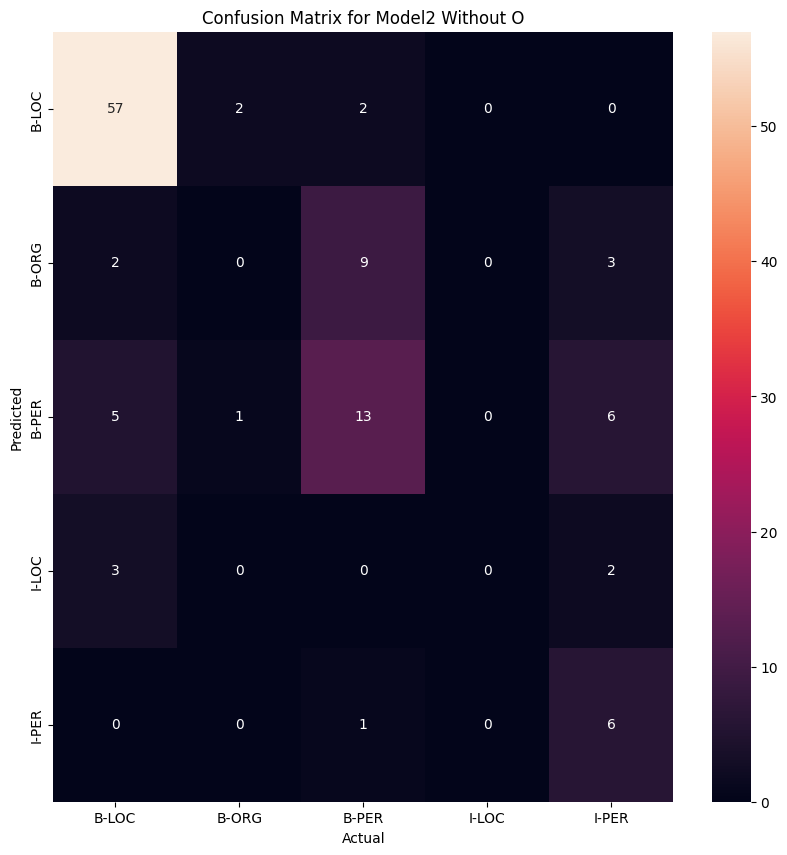

Epochs: 100%|██████████| 5/5 [00:13<00:00,  2.74s/it]


Classification Report With O For Model3
              precision    recall  f1-score   support

       B-LOC       0.00      0.00      0.00       343
       B-ORG       0.00      0.00      0.00       350
       B-PER       0.00      0.00      0.00       434
       I-LOC       0.00      0.00      0.00        53
       I-ORG       0.00      0.00      0.00       200
       I-PER       0.00      0.00      0.00       296
           O       0.80      1.00      0.89      6567

    accuracy                           0.80      8243
   macro avg       0.11      0.14      0.13      8243
weighted avg       0.63      0.80      0.71      8243




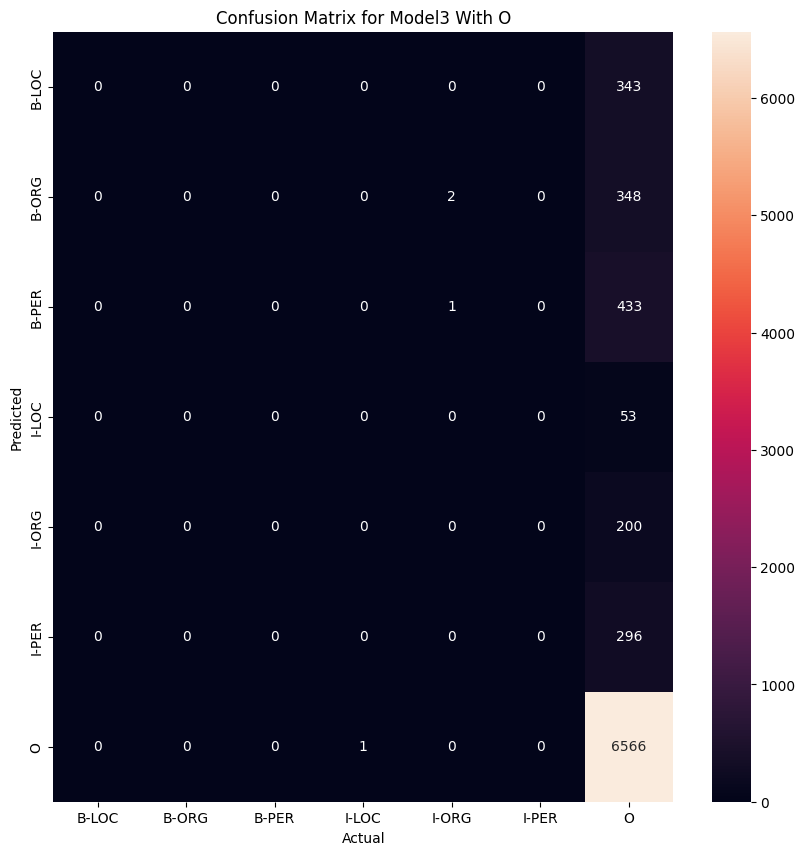

Classification Report Without O For Model3
              precision    recall  f1-score   support

       B-ORG       0.00      0.00      0.00       2.0
       B-PER       0.00      0.00      0.00       1.0
       I-ORG       0.00      0.00      0.00       0.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0




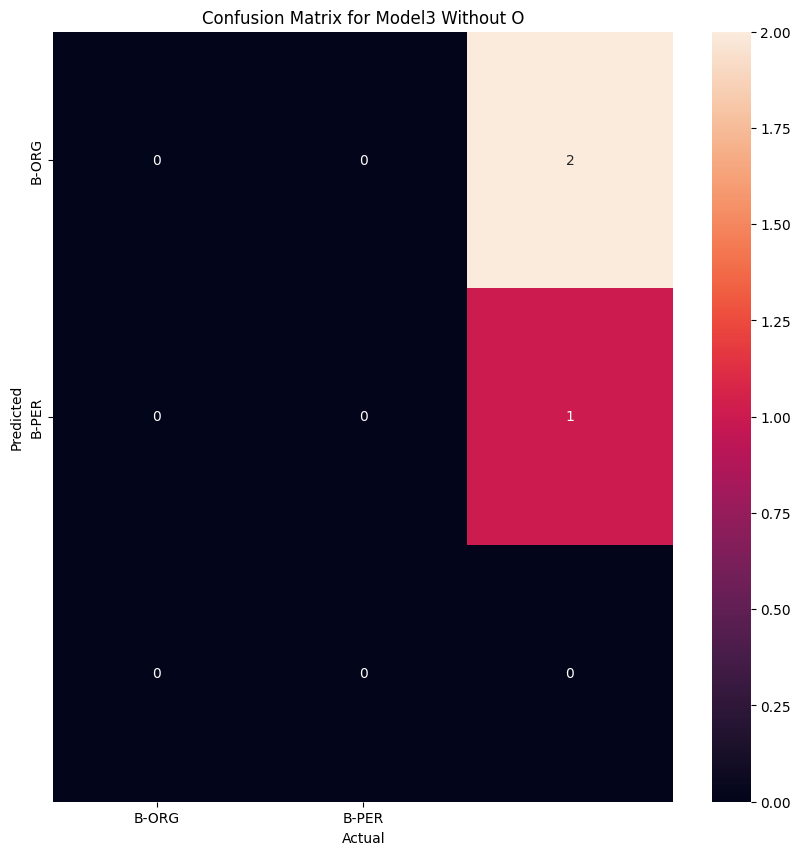

Epochs: 100%|██████████| 5/5 [00:08<00:00,  1.67s/it]


Classification Report With O For Model4
              precision    recall  f1-score   support

       B-LOC       0.64      0.31      0.42       343
       B-ORG       0.65      0.14      0.23       350
       B-PER       0.63      0.43      0.51       434
       I-LOC       0.00      0.00      0.00        53
       I-ORG       0.00      0.00      0.00       200
       I-PER       0.56      0.54      0.55       296
           O       0.86      0.98      0.92      6567

    accuracy                           0.84      8243
   macro avg       0.48      0.34      0.37      8243
weighted avg       0.80      0.84      0.80      8243




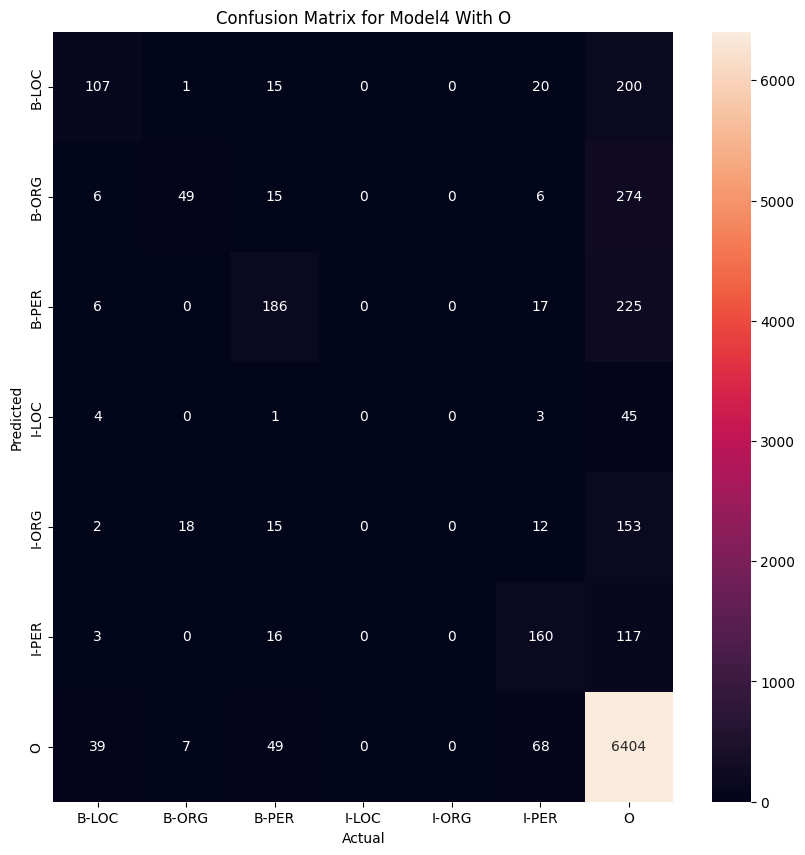

Classification Report Without O For Model4
              precision    recall  f1-score   support

       B-LOC       0.84      0.75      0.79       143
       B-ORG       0.72      0.64      0.68        76
       B-PER       0.75      0.89      0.81       209
       I-LOC       0.00      0.00      0.00         8
       I-ORG       0.00      0.00      0.00        47
       I-PER       0.73      0.89      0.81       179

    accuracy                           0.76       662
   macro avg       0.51      0.53      0.52       662
weighted avg       0.70      0.76      0.72       662




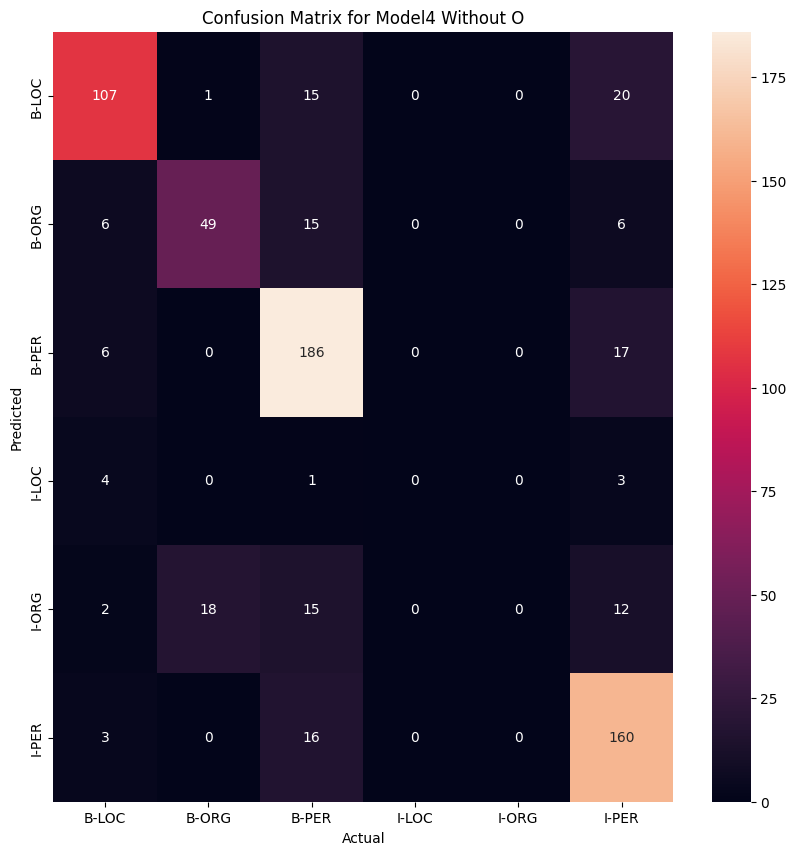

Epochs: 100%|██████████| 5/5 [00:18<00:00,  3.63s/it]


Classification Report With O For Model5
              precision    recall  f1-score   support

       B-LOC       0.62      0.57      0.60       343
       B-ORG       0.76      0.33      0.46       350
       B-PER       0.70      0.54      0.61       434
       I-LOC       0.00      0.00      0.00        53
       I-ORG       0.83      0.05      0.09       200
       I-PER       0.75      0.55      0.63       296
           O       0.89      0.98      0.93      6567

    accuracy                           0.87      8243
   macro avg       0.65      0.43      0.47      8243
weighted avg       0.85      0.87      0.84      8243




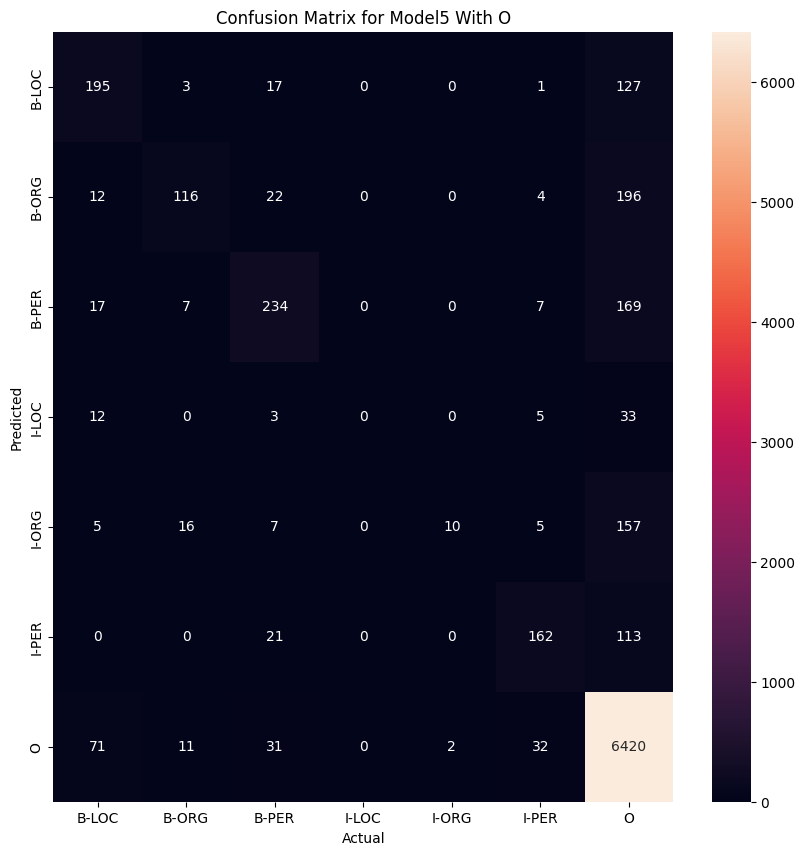

Classification Report Without O For Model5
              precision    recall  f1-score   support

       B-LOC       0.81      0.90      0.85       216
       B-ORG       0.82      0.75      0.78       154
       B-PER       0.77      0.88      0.82       265
       I-LOC       0.00      0.00      0.00        20
       I-ORG       1.00      0.23      0.38        43
       I-PER       0.88      0.89      0.88       183

    accuracy                           0.81       881
   macro avg       0.71      0.61      0.62       881
weighted avg       0.80      0.81      0.80       881




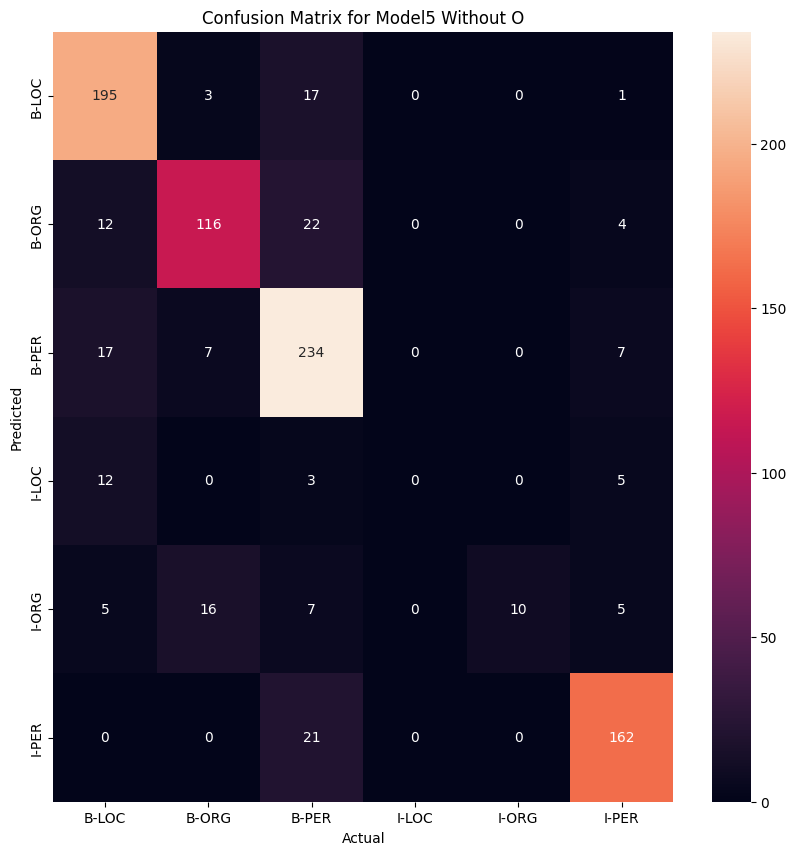

Epochs: 100%|██████████| 5/5 [00:29<00:00,  5.81s/it]


Classification Report With O For Model6
              precision    recall  f1-score   support

       B-LOC       0.77      0.38      0.51       343
       B-ORG       0.57      0.45      0.50       350
       B-PER       0.70      0.56      0.62       434
       I-LOC       0.00      0.00      0.00        53
       I-ORG       0.61      0.19      0.29       200
       I-PER       0.69      0.64      0.66       296
           O       0.90      0.98      0.94      6567

    accuracy                           0.87      8243
   macro avg       0.61      0.46      0.50      8243
weighted avg       0.85      0.87      0.85      8243




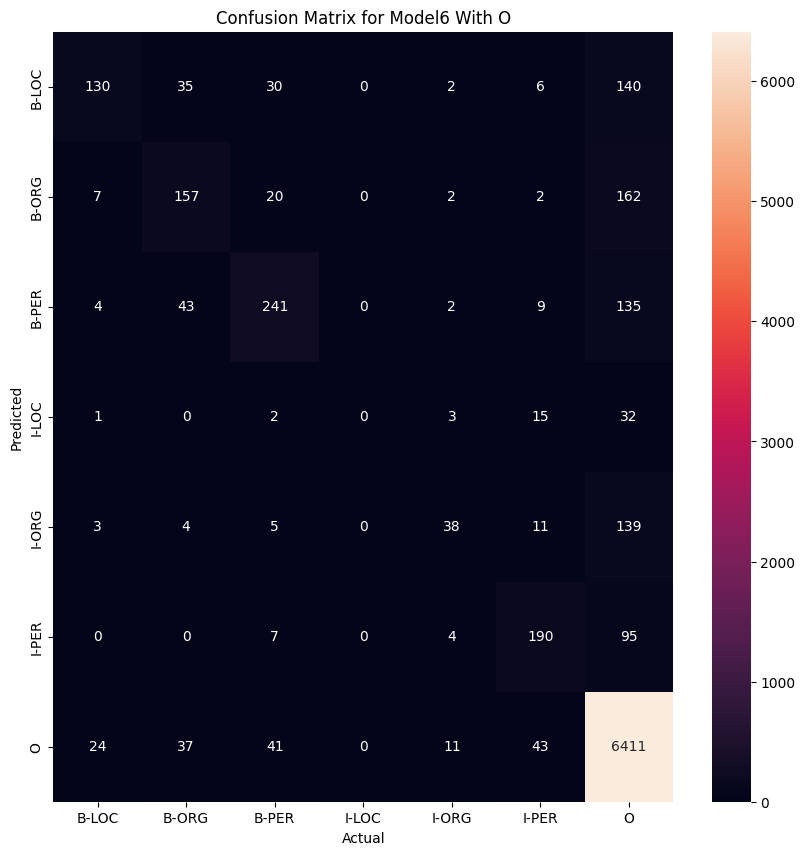

Classification Report Without O For Model6
              precision    recall  f1-score   support

       B-LOC       0.90      0.64      0.75       203
       B-ORG       0.66      0.84      0.74       188
       B-PER       0.79      0.81      0.80       299
       I-LOC       0.00      0.00      0.00        21
       I-ORG       0.75      0.62      0.68        61
       I-PER       0.82      0.95      0.88       201

    accuracy                           0.78       973
   macro avg       0.65      0.64      0.64       973
weighted avg       0.77      0.78      0.77       973




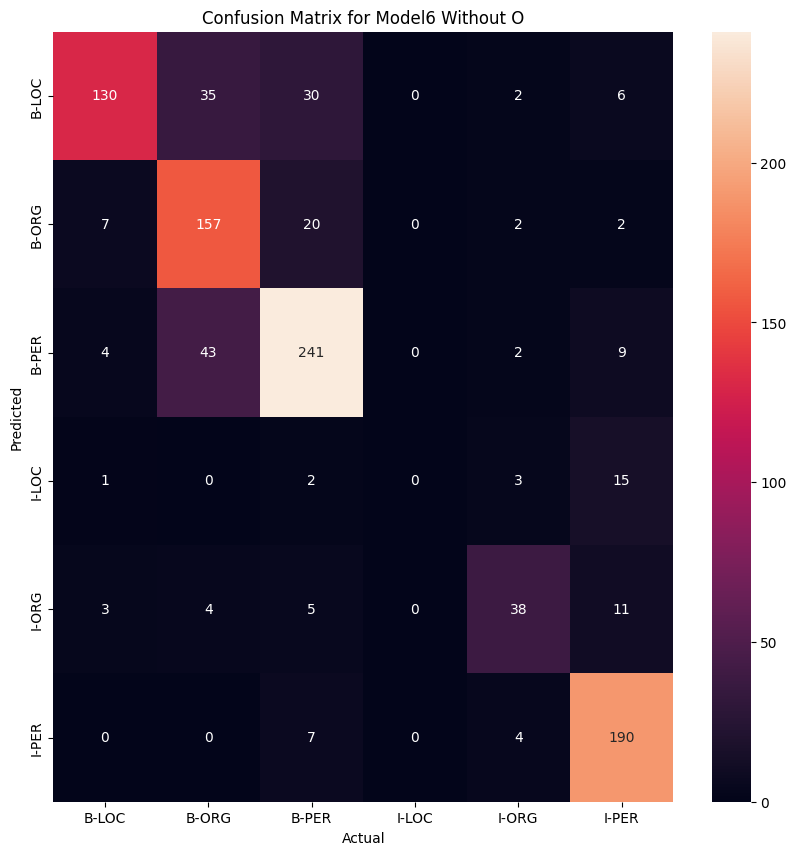

Epochs: 100%|██████████| 5/5 [00:19<00:00,  3.96s/it]


Classification Report With O For Model7
              precision    recall  f1-score   support

       B-LOC       0.54      0.43      0.48       343
       B-ORG       0.73      0.17      0.27       350
       B-PER       0.74      0.45      0.56       434
       I-LOC       0.00      0.00      0.00        53
       I-ORG       1.00      0.01      0.02       200
       I-PER       0.62      0.60      0.61       296
           O       0.87      0.98      0.92      6567

    accuracy                           0.85      8243
   macro avg       0.64      0.38      0.41      8243
weighted avg       0.83      0.85      0.82      8243




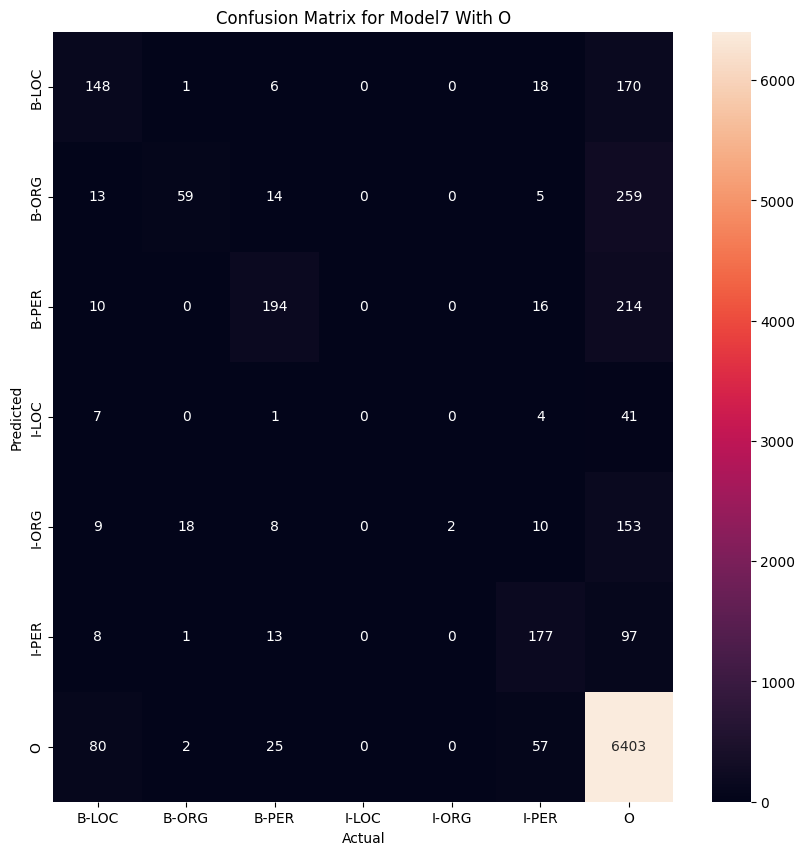

Classification Report Without O For Model7
              precision    recall  f1-score   support

       B-LOC       0.76      0.86      0.80       173
       B-ORG       0.75      0.65      0.69        91
       B-PER       0.82      0.88      0.85       220
       I-LOC       0.00      0.00      0.00        12
       I-ORG       1.00      0.04      0.08        47
       I-PER       0.77      0.89      0.83       199

    accuracy                           0.78       742
   macro avg       0.68      0.55      0.54       742
weighted avg       0.78      0.78      0.75       742




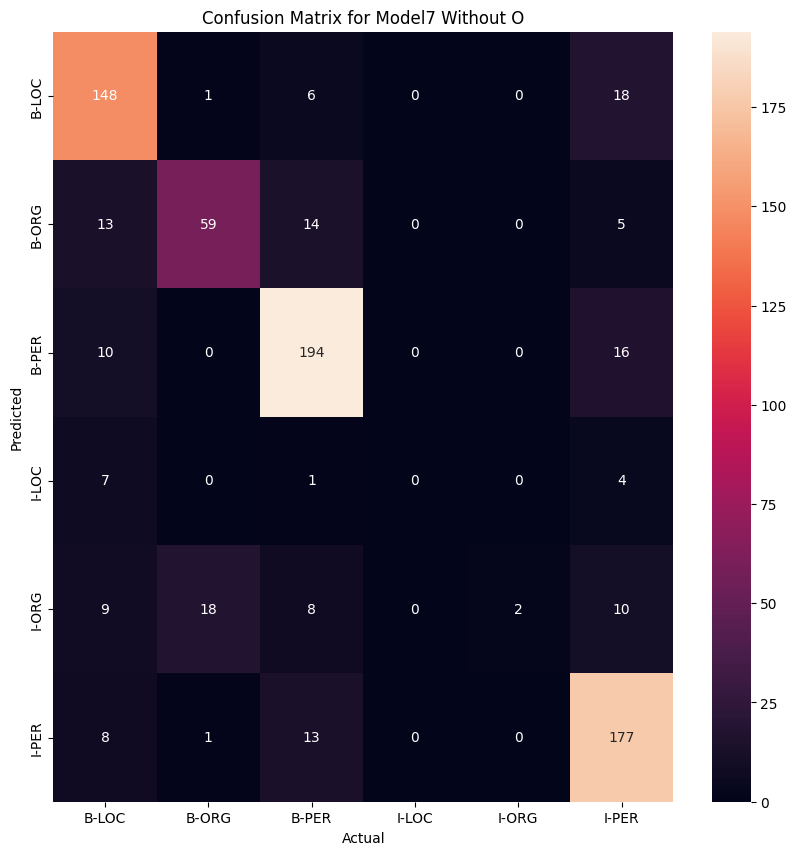

Epochs: 100%|██████████| 5/5 [00:48<00:00,  9.71s/it]


Classification Report With O For Model8
              precision    recall  f1-score   support

       B-LOC       0.78      0.52      0.63       343
       B-ORG       0.62      0.51      0.56       350
       B-PER       0.83      0.57      0.67       434
       I-LOC       1.00      0.17      0.29        53
       I-ORG       0.46      0.23      0.31       200
       I-PER       0.78      0.70      0.74       296
           O       0.91      0.97      0.94      6567

    accuracy                           0.88      8243
   macro avg       0.77      0.53      0.59      8243
weighted avg       0.87      0.88      0.87      8243




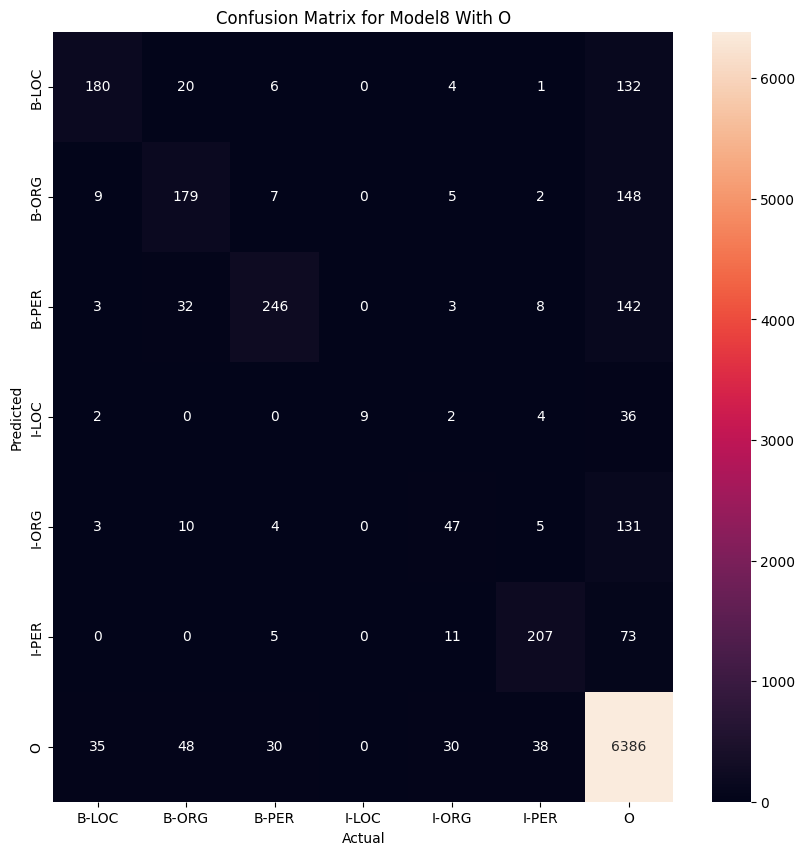

Classification Report Without O For Model8
              precision    recall  f1-score   support

       B-LOC       0.91      0.85      0.88       211
       B-ORG       0.74      0.89      0.81       202
       B-PER       0.92      0.84      0.88       292
       I-LOC       1.00      0.53      0.69        17
       I-ORG       0.65      0.68      0.67        69
       I-PER       0.91      0.93      0.92       223

    accuracy                           0.86      1014
   macro avg       0.86      0.79      0.81      1014
weighted avg       0.86      0.86      0.86      1014




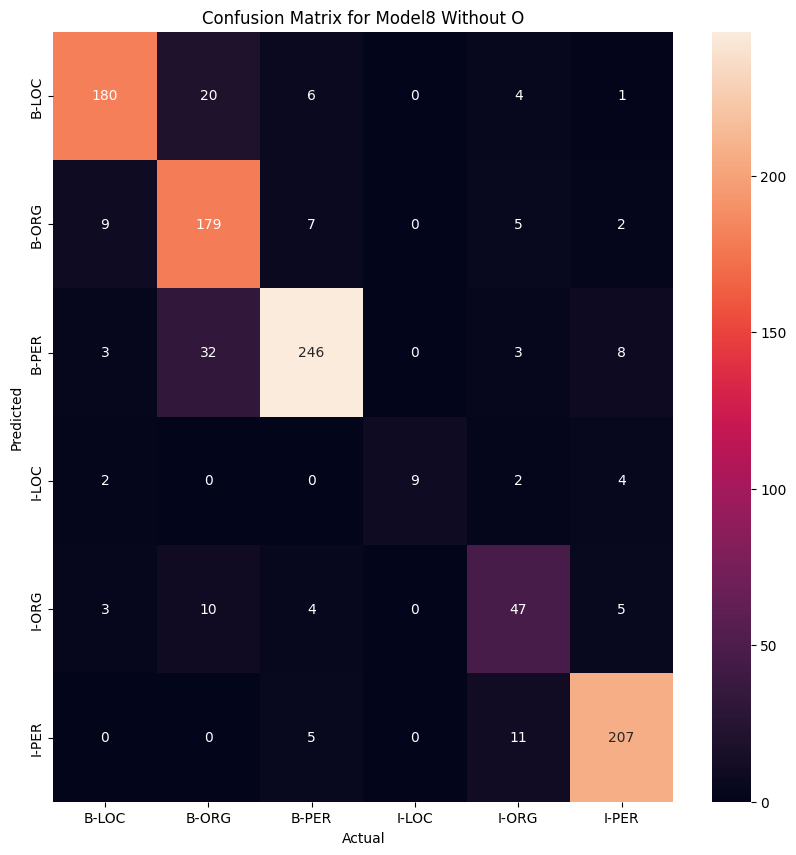

Epochs: 100%|██████████| 5/5 [01:19<00:00, 15.81s/it]


Classification Report With O For Model9
              precision    recall  f1-score   support

       B-LOC       0.78      0.55      0.65       343
       B-ORG       0.69      0.45      0.55       350
       B-PER       0.78      0.64      0.70       434
       I-LOC       0.86      0.34      0.49        53
       I-ORG       0.55      0.27      0.36       200
       I-PER       0.79      0.69      0.74       296
           O       0.91      0.98      0.94      6567

    accuracy                           0.89      8243
   macro avg       0.76      0.56      0.63      8243
weighted avg       0.88      0.89      0.88      8243




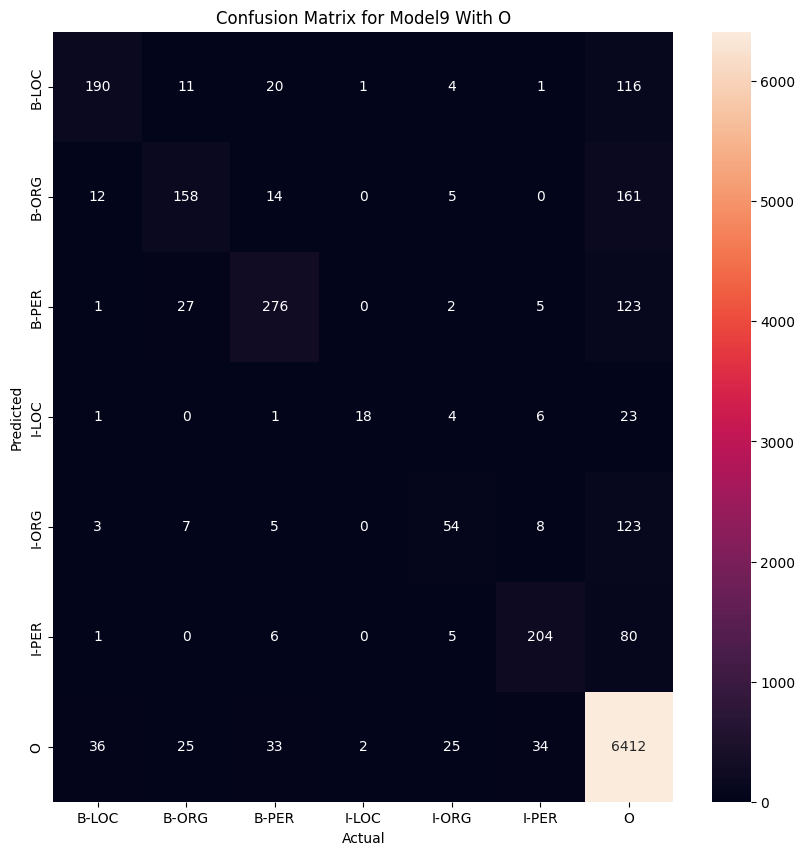

Classification Report Without O For Model9
              precision    recall  f1-score   support

       B-LOC       0.91      0.84      0.87       227
       B-ORG       0.78      0.84      0.81       189
       B-PER       0.86      0.89      0.87       311
       I-LOC       0.95      0.60      0.73        30
       I-ORG       0.73      0.70      0.72        77
       I-PER       0.91      0.94      0.93       216

    accuracy                           0.86      1050
   macro avg       0.86      0.80      0.82      1050
weighted avg       0.86      0.86      0.86      1050




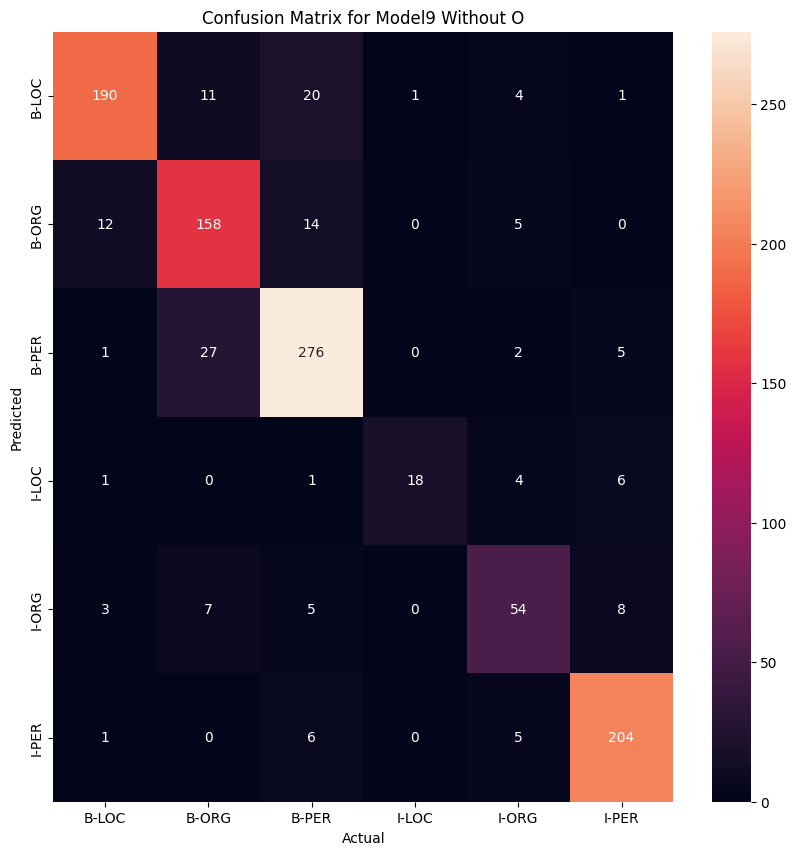

+----+-----------+---------------+------------+--------------+----------+-------------+--------+---------------+------------------+-----------+
|    | N_MODEL   |   HIDDEN_SIZE |   N_LAYERS |   DIRECTIONS |   RECALL |   PERCISION |     F1 |   RECALL_WO_O |   PERCISION_WO_O |   F1_WO_O |
|----+-----------+---------------+------------+--------------+----------+-------------+--------+---------------+------------------+-----------|
|  0 | Model1    |           500 |          1 |            1 |   0.8030 |      0.7201 | 0.7263 |        0.6129 |           0.6660 |    0.6082 |
|  1 | Model2    |           500 |          2 |            1 |   0.8036 |      0.7077 | 0.7265 |        0.6786 |           0.6015 |    0.6324 |
|  2 | Model3    |           500 |          3 |            1 |   0.7966 |      0.6349 | 0.7066 |        0.0000 |           0.0000 |    0.0000 |
|  3 | Model4    |           500 |          1 |            2 |   0.8378 |      0.7952 | 0.8034 |        0.7583 |           0.6985 |    0

In [ ]:
results = pd.DataFrame(columns=columns)
file_name = "NER_results_glove.csv"
# TO DO ----------------------------------------------------------------------
results_glove = []
for model_name, model_params in models.items():
  model = NERNet(vocab.n_words, output_size=vocab.n_tags, **model_params)
  model.to(DEVICE)
  metrics = train_loop(model, n_epochs=N_EPOCHS, dataloader_train=dl_train, dataloader_dev=dl_dev)
  result = {
    'N_MODEL': model_name,
    'HIDDEN_SIZE': model_params['hidden_size'],
    'N_LAYERS': model_params['n_layers'],
    'DIRECTIONS': model_params['directions'],
  }
  result.update(evaluate(model, model_name, dl_test, vocab))
  results_glove.append(result)

  th.save(model.state_dict(), f"{model_name}_glove.pt")

results = pd.DataFrame(results_glove)
results.to_csv(file_name, index=False)

# TO DO ----------------------------------------------------------------------

print(tabulate(results, headers='keys', tablefmt='psql',floatfmt=".4f"))

## Step 4 - best model
Decide which model performs the best, write its configuration, train it for 5 more epochs and evaluate it on the test set.

The best model is Model9 with F1 score of 0.8762665394676529
{'embedding_size': 300, 'hidden_size': 800, 'n_layers': 3, 'directions': 2}


Epochs: 100%|██████████| 5/5 [01:19<00:00, 15.88s/it]


Classification Report With O For Model9
              precision    recall  f1-score   support

       B-LOC       0.73      0.80      0.76       343
       B-ORG       0.67      0.64      0.65       350
       B-PER       0.88      0.61      0.72       434
       I-LOC       0.63      0.64      0.64        53
       I-ORG       0.54      0.46      0.50       200
       I-PER       0.92      0.69      0.79       296
           O       0.94      0.97      0.96      6567

    accuracy                           0.91      8243
   macro avg       0.76      0.69      0.72      8243
weighted avg       0.91      0.91      0.91      8243




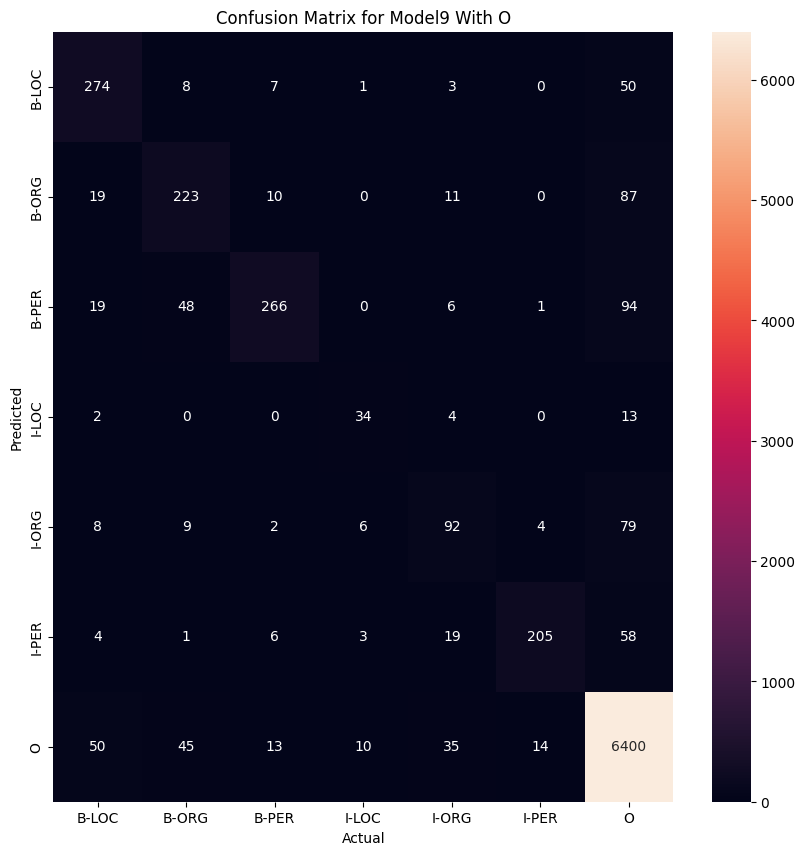

Classification Report Without O For Model9
              precision    recall  f1-score   support

       B-LOC       0.84      0.94      0.89       293
       B-ORG       0.77      0.85      0.81       263
       B-PER       0.91      0.78      0.84       340
       I-LOC       0.77      0.85      0.81        40
       I-ORG       0.68      0.76      0.72       121
       I-PER       0.98      0.86      0.92       238

    accuracy                           0.84      1295
   macro avg       0.83      0.84      0.83      1295
weighted avg       0.85      0.84      0.85      1295




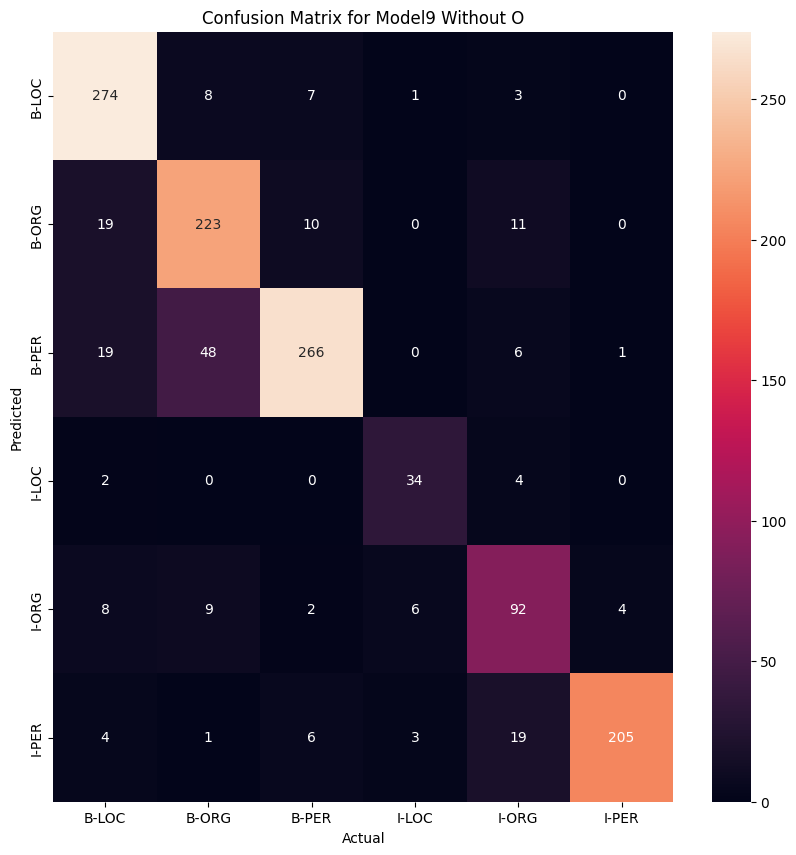

{'RECALL': 0.9091350236564357, 'PERCISION': 0.9066974613978718, 'F1': 0.9057886847981261, 'RECALL_WO_O': 0.8447876447876448, 'PERCISION_WO_O': 0.8538174374150684, 'F1_WO_O': 0.8461059839984414}


In [ ]:
best_model_glove_cfg = {'embedding_size':EMB_DIM, 'hidden_size': -1, 'n_layers': -1, 'directions': -1}
# TO DO ----------------------------------------------------------------------

best_model_glove_name = results.loc[results['F1'].idxmax()]['N_MODEL']
best_model_glove_cfg = models[best_model_glove_name]
print(f'The best model is {best_model_glove_name} with F1 score of {results["F1"].max()}')

print(best_model_glove_cfg)
# load the best model
model = NERNet(vocab.n_words, output_size=vocab.n_tags, **best_model_glove_cfg)
model.to(DEVICE)
model.load_state_dict(th.load(f"{best_model_glove_name}_glove.pt"))
# train it for 5 more epochs
metrics = train_loop(model, n_epochs=5, dataloader_train=dl_train, dataloader_dev=dl_dev)
# evaluate it on the test set
results = evaluate(model, best_model_glove_name, dl_test, vocab)
print(results)
# TO DO ----------------------------------------------------------------------

# Testing
Copy the content of the **tests.py** file from the repo and paste below. This will create the results.json file and download it to your machine.

Epochs: 100%|██████████| 10/10 [02:39<00:00, 15.94s/it]


Classification Report With O For 
              precision    recall  f1-score   support

       B-LOC       0.67      0.85      0.75       343
       B-ORG       0.67      0.63      0.65       350
       B-PER       0.88      0.70      0.78       434
       I-LOC       0.45      0.64      0.53        53
       I-ORG       0.47      0.55      0.50       200
       I-PER       0.92      0.75      0.83       296
           O       0.96      0.96      0.96      6567

    accuracy                           0.91      8243
   macro avg       0.72      0.73      0.71      8243
weighted avg       0.91      0.91      0.91      8243




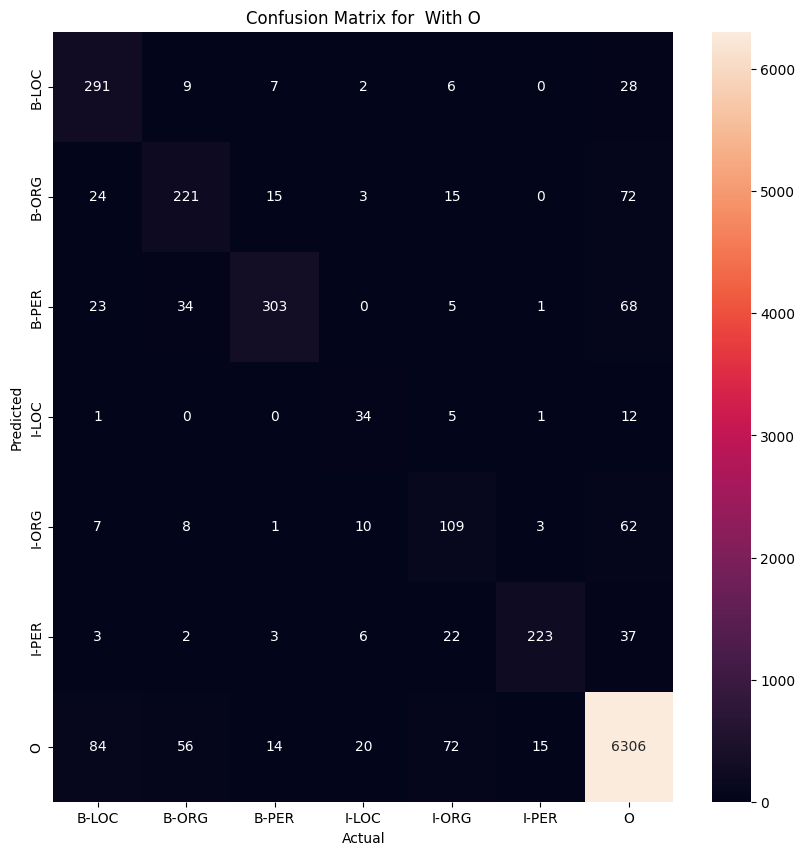

Classification Report Without O For 
              precision    recall  f1-score   support

       B-LOC       0.83      0.92      0.88       315
       B-ORG       0.81      0.79      0.80       278
       B-PER       0.92      0.83      0.87       366
       I-LOC       0.62      0.83      0.71        41
       I-ORG       0.67      0.79      0.73       138
       I-PER       0.98      0.86      0.92       259

    accuracy                           0.85      1397
   macro avg       0.81      0.84      0.82      1397
weighted avg       0.86      0.85      0.85      1397




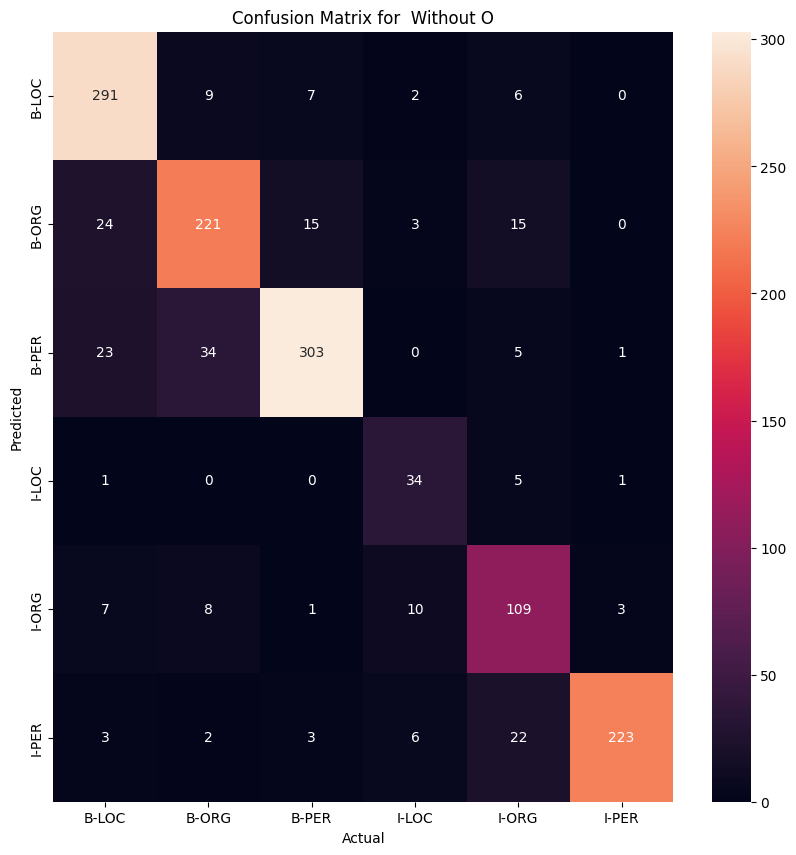

Epochs: 100%|██████████| 10/10 [02:39<00:00, 15.92s/it]


Classification Report With O For 
              precision    recall  f1-score   support

       B-LOC       0.75      0.84      0.79       343
       B-ORG       0.73      0.62      0.67       350
       B-PER       0.90      0.68      0.78       434
       I-LOC       0.65      0.62      0.63        53
       I-ORG       0.56      0.53      0.55       200
       I-PER       0.93      0.76      0.84       296
           O       0.95      0.98      0.96      6567

    accuracy                           0.92      8243
   macro avg       0.78      0.72      0.75      8243
weighted avg       0.92      0.92      0.92      8243




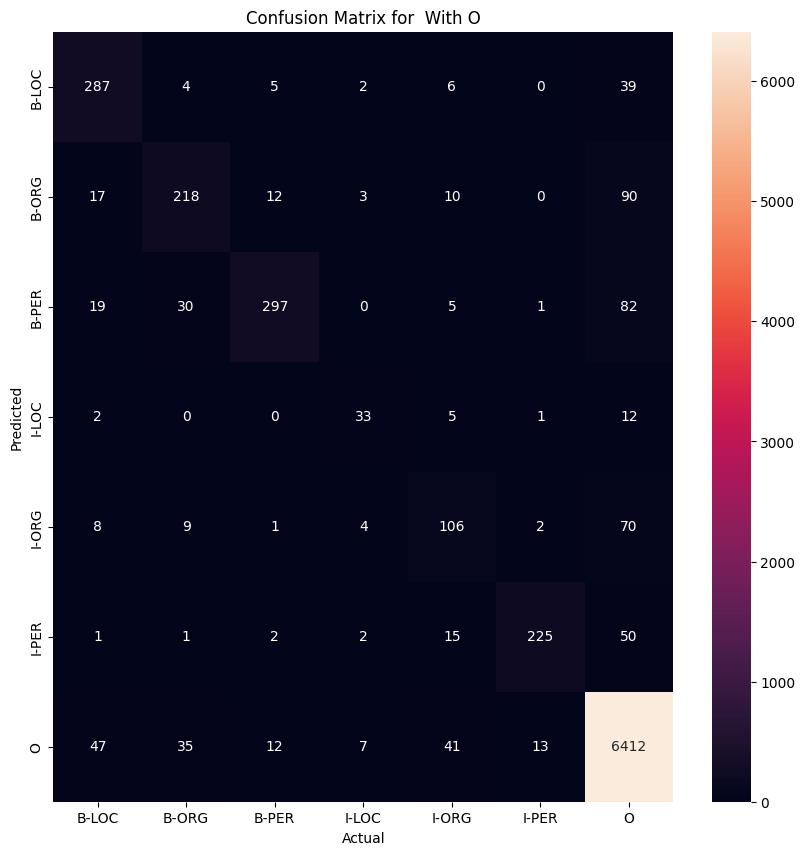

Classification Report Without O For 
              precision    recall  f1-score   support

       B-LOC       0.86      0.94      0.90       304
       B-ORG       0.83      0.84      0.84       260
       B-PER       0.94      0.84      0.89       352
       I-LOC       0.75      0.80      0.78        41
       I-ORG       0.72      0.82      0.77       130
       I-PER       0.98      0.91      0.95       246

    accuracy                           0.87      1333
   macro avg       0.85      0.86      0.85      1333
weighted avg       0.88      0.87      0.88      1333




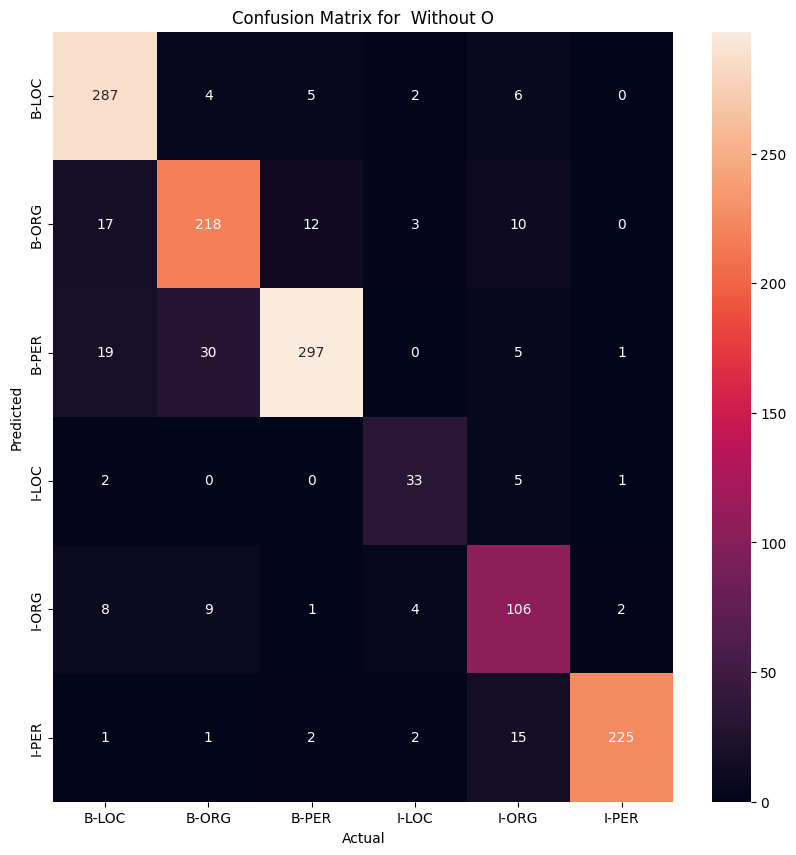

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
####################
# PLACE TESTS HERE #
import json
from google.colab import files

train = read_data("data/train.txt")
dev = read_data("data/dev.txt")
test_set = read_data("data/test.txt")
def test_read_data():
    result = {
        'lengths': (len(train), len(dev), len(test_set)),
    }
    return result

vocab = Vocab(train)
def test_vocab():
    sent = vocab.index_words(["I", "am", "Spongebob"])
    return {
        'length': vocab.n_words,
        'tag2id_length': len(vocab.tag2id),
        "Spongebob": sent[2]
    }

train_sequences = prepare_data(train, vocab)
dev_sequences = prepare_data(dev, vocab)
test_sequences = prepare_data(test_set, vocab)

def test_count_oov():
    return {
        'dev_oov': count_oov(dev_sequences),
        'test_oov': count_oov(test_sequences)
    }

BATCH_SIZE = 16
dl_train = prepare_data_loader(train_sequences, batch_size=BATCH_SIZE)
dl_dev = prepare_data_loader(dev_sequences, batch_size=BATCH_SIZE, train=False)
dl_test = prepare_data_loader(test_sequences, batch_size=BATCH_SIZE, train=False)

def test_prepare_data_loader():
    return {
        'lengths': (len(dl_train), len(dl_dev), len(dl_test))
    }


def test_NERNet():
    # Extract best model configuration
    hidden_size = best_model_cfg['hidden_size']
    n_layers = best_model_cfg['n_layers']
    directions = best_model_cfg['directions']

    # Create model
    best_model = NERNet(vocab.n_words, embedding_size=300, hidden_size=hidden_size, n_layers=n_layers, directions=directions, output_size=vocab.n_tags)
    best_model.to(DEVICE)

    # Train model and evaluate
    _ = train_loop(model, n_epochs=10, dataloader_train=dl_train, dataloader_dev=dl_dev)
    results = evaluate(model, title="", dataloader=dl_test, vocab=vocab)

    return {
        'f1': results['F1'],
        'f1_wo_o': results['F1_WO_O'],
    }

def test_glove():
    # Get embeddings
    emb_file = 'glove.6B.300d.txt'
    emb_matrix = get_emb_matrix(emb_file, vocab)

    # Extract best model configuration
    hidden_size = best_model_glove_cfg['hidden_size']
    n_layers = best_model_glove_cfg['n_layers']
    directions = best_model_glove_cfg['directions']

    # Create model
    best_model = NERNet(vocab.n_words, embedding_size=300, hidden_size=hidden_size, n_layers=n_layers, directions=directions, output_size=vocab.n_tags)
    best_model.to(DEVICE)
    initialize_from_pretrained_emb(ner_glove, emb_matrix)

    # Train model and evaluate
    _ = train_loop(model, n_epochs=10, dataloader_train=dl_train, dataloader_dev=dl_dev)
    results = evaluate(model, title="", dataloader=dl_test, vocab=vocab)

    return {
        'f1': results['F1'],
        'f1_wo_o': results['F1_WO_O'],
    }

TESTS = [
    test_read_data,
    test_vocab,
    test_count_oov,
    test_prepare_data_loader,
    test_NERNet,
    test_glove
]

# Run tests and save results
res = {}
for test in TESTS:
    try:
        cur_res = test()
        res.update({test.__name__: cur_res})
    except Exception as e:
        res.update({test.__name__: repr(e)})

with open('results.json', 'w') as f:
    json.dump(res, f, indent=2)

# Download the results.json file
files.download('results.json')

####################